In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import sympy as sp

import gamelab.finitegames as nfg
import symplecticFTRL
import choice
import aspera.utils

In [3]:
primal_letter = 'x'
dual_letter = 'y'
quot_letter = 'z'

## Utils

In [4]:
# switch between coords and points
#def coords_points(L):

	#https://stackoverflow.com/questions/2921847/what-does-the-star-operator-mean-in-a-function-call
#	def make(*values):
#		return values

#	return make(*zip(*L))

In [5]:
flatten = nfg.Utils.flatten
coords_points = aspera.utils.coords_points

# Symplectic FTRL on mixed extension of $[2 \times 2]$ normal form games

In [6]:
skeleton = [2, 2]

In [7]:
BARE = nfg.NFG_bare(skeleton, "numeric", primal_letter)

In [8]:
help(nfg.NFG)

Help on class NFG in module gamelab.finitegames:

class NFG(NFG_bare)
 |  NFG(skeleton, strat_format, primal_letter, dual_letter, name, payoff_tensors)
 |
 |  docstring for ClassName
 |
 |  Method resolution order:
 |      NFG
 |      NFG_bare
 |      Skeleton
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, skeleton, strat_format, primal_letter, dual_letter, name, payoff_tensors)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  make_clean_payfield(self)
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from NFG_bare:
 |
 |  make_packed(self, letter, skeleton)
 |      Returns packed list of multi-indexed letter, e.g. [[x0_0, x0_1], [x1_0, x1_1]]
 |
 |  make_strat(self, xi, skeleton)
 |      - Given names for strats_play, say [x_0, x_1, x_2] or [x, y, z], generates corresponding strat
 |      - Initialize an empty list to store the symbolic entries
 |      - Returns list of sympy mat

In [9]:
BARE.strat

[Matrix([
 [x0_0],
 [x0_1]]),
 Matrix([
 [x1_0],
 [x1_1]])]

In [10]:
BARE.primal_vars

[x0_0, x0_1, x1_0, x1_1]

In [11]:
BARE.make_vars('y', skeleton)

[y0_0, y0_1, y1_0, y1_1]

In [12]:
BARE.strat_play

(x0, x1)

## Games

In [13]:
# Matching pennies
payoff = [3, -3, -3, 3, -3, 3, 3, -3]
MP = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Matching Pennies', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

In [14]:
MP.payfield

[[3*x1_0 - 3*x1_1, -3*x1_0 + 3*x1_1], [-3*x0_0 + 3*x0_1, 3*x0_0 - 3*x0_1]]

In [15]:
MP.quotpayfield

[array([0, -6*x1_0 + 6*x1_1], dtype=object),
 array([0, 6*x0_0 - 6*x0_1], dtype=object)]

In [16]:
MP.map_payfield.present()


V: X0 x X1(4) --> TY0 x TY1(4) 
 (x0_0, x0_1, x1_0, x1_1) --> (y'0_0, y'0_1, y'1_0, y'1_1) = [3*x1_0 - 3*x1_1, -3*x1_0 + 3*x1_1, -3*x0_0 + 3*x0_1, 3*x0_0 - 3*x0_1]


In [17]:
MP.map_quotpayfield.present()


v: X0 x X1(4) --> TZ0 x TZ1(4) 
 (x0_0, x0_1, x1_0, x1_1) --> (z'0_0, z'0_1, z'1_0, z'1_1) = [0, -6*x1_0 + 6*x1_1, 0, 6*x0_0 - 6*x0_1]


In [18]:
MP.map_eff_quotpayfield.present()


v: X0 x X1(2) --> TZ0 x TZ1(2) 
 (x0_1, x1_1) --> (z'0_1, z'1_1) = [12*x1_1 - 6, 6 - 12*x0_1]


In [19]:


# generalized harmonic
payoff = [-1, -4, -3, -1, 1, 2, 2, -2] 
GH = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Generalized Harmonic', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# prisoner's dilemma
payoff = [2, 0, 3, 1, 2, 3, 0, 1]
PD = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Prisoners Dilemma', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# split or steal
payoff = [5, 0, 10, 0, 5, 10, 0, 0]
SS = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Split or Steal', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# battle of sexes
payoff = [3, 0, 0, 2, 2, 0, 0, 3]
BS = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Battle of the Sexes', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# chicken
payoff = [-5, 2, 1, 0, -5, 1, 2, 0]
CH = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Chicken', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# coordination
payoff = [5, 1, 1, 4, 5, 1, 1, 4]
CO = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Coordination', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# anti-coordination
payoff = [1, 5, 4, 1, 1, 4, 5, 1]
ACO = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Anti-Coordination', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

# cyclic
payoff = [5, 1, 1, 4, -5, 1, 1, -4]
CY = nfg.NFG(skeleton = skeleton , strat_format = 'numeric', primal_letter = primal_letter, dual_letter = dual_letter, name = 'Cyclic', payoff_tensors =  nfg.Utils.u_flat_to_tensor(payoff, skeleton))

In [20]:
#GAMES = [MP, GH, PD, SS, BS, CH, CO, ACO, CY]
GAMES = [MP, GH, PD, CY]

## Vars

In [21]:
primal_vars = BARE.primal_vars
primal_vars

[x0_0, x0_1, x1_0, x1_1]

In [22]:
dual_vars = BARE.make_vars(dual_letter, skeleton)
dual_vars

[y0_0, y0_1, y1_0, y1_1]

In [23]:
quot_vars = BARE.make_vars(quot_letter, skeleton)
quot_vars

[z0_0, z0_1, z1_0, z1_1]

In [24]:
BARE.make_vars_play(dual_letter, skeleton)

(y0, y1)

In [25]:
BARE.make_packed(dual_letter, skeleton)

[(y0_0, y0_1), (y1_0, y1_1)]

In [26]:
# LOGIT CHOICE
#sym_choice = [
#    sp.exp(dual_vars[0]) / ( sp.exp(dual_vars[0]) +  sp.exp(dual_vars[1])),
#    sp.exp(dual_vars[1]) / ( sp.exp(dual_vars[0]) +  sp.exp(dual_vars[1])),
#    sp.exp(dual_vars[2]) / ( sp.exp(dual_vars[2]) +  sp.exp(dual_vars[3])),
#    sp.exp(dual_vars[3]) / ( sp.exp(dual_vars[2]) +  sp.exp(dual_vars[3])),
#]

In [27]:
logit = choice.MultiLogit(primal_letter, dual_letter, skeleton)
logit.Q.ex

Matrix([
[exp(y0_0)/(exp(y0_0) + exp(y0_1))],
[exp(y0_1)/(exp(y0_0) + exp(y0_1))],
[exp(y1_0)/(exp(y1_0) + exp(y1_1))],
[exp(y1_1)/(exp(y1_0) + exp(y1_1))]])

# Z quotient

In [28]:
quotlogit = choice.QuotientMultiLogit(primal_letter, dual_letter, skeleton, quot_letter)
quotlogit.Q.ex

Matrix([
[        1/(exp(z0_1) + 1)],
[exp(z0_1)/(exp(z0_1) + 1)],
[        1/(exp(z1_1) + 1)],
[exp(z1_1)/(exp(z1_1) + 1)]])

In [29]:
quotlogit.eff_Q.ex

Matrix([
[exp(z0_1)/(exp(z0_1) + 1)],
[exp(z1_1)/(exp(z1_1) + 1)]])

### Access primal and dual spaces either by primal space and dual space of MultiLogit instance, or domain and codomain of Map instance

In [30]:
logit.primal_space.present()

X0 x X1 4 (x0_0, x0_1, x1_0, x1_1)


In [31]:
logit.Q.codomain.present()

X0 x X1 4 (x0_0, x0_1, x1_0, x1_1)


In [32]:
logit.dual_space.present()

Y0 x Y1 4 (y0_0, y0_1, y1_0, y1_1)


In [33]:
logit.Q.domain.present()

Y0 x Y1 4 (y0_0, y0_1, y1_0, y1_1)


## Symplectic FTRL

In [34]:
SFTRL_GAMES = [ symplecticFTRL.SFTRL(game.map_payfield, logit.Q, primal_vars, dual_vars, game.name) for game in GAMES ]

In [35]:
SFTRL_GAMES[0].choice( 1, 2, 3, 4 )

[0.2689414213699951,
 0.7310585786300049,
 0.2689414213699951,
 0.7310585786300048]

In [36]:
SFTRL_GAMES[0].payfield(1, 2, 3, 4)

[-3, 3, 3, -3]

In [37]:
SFTRL_GAMES[0].dVQ_VQ(1, 2, 3, 4)

[-6.541757832452285, 6.541757832452285, -6.541757832452284, 6.541757832452284]

## Z FTRL

In [38]:
ZSFTRL_GAMES = [ symplecticFTRL.ZSFTRL(game.map_quotpayfield, quotlogit.Q, primal_vars, quot_vars, game.name) for game in GAMES ]

In [39]:
test = ZSFTRL_GAMES[0]

In [40]:
test.map_VQ.present()


v(q_0 x q_1): Z0 x Z1(4) --> TZ0 x TZ1(4) 
 (z0_0, z0_1, z1_0, z1_1) --> (z'0_0, z'0_1, z'1_0, z'1_1) = [0, 6*tanh(z1_1/2), 0, -6*tanh(z0_1/2)]


In [41]:
test.sym_JQ

Matrix([
[0,                              -exp(z0_1)/(exp(z0_1) + 1)**2, 0,                                                          0],
[0, exp(z0_1)/(exp(z0_1) + 1) - exp(2*z0_1)/(exp(z0_1) + 1)**2, 0,                                                          0],
[0,                                                          0, 0,                              -exp(z1_1)/(exp(z1_1) + 1)**2],
[0,                                                          0, 0, exp(z1_1)/(exp(z1_1) + 1) - exp(2*z1_1)/(exp(z1_1) + 1)**2]])

In [42]:
ZSFTRL_GAMES[0].VQ(1, 2, 3, 4)

[0, 5.784165480454901, 0, -4.569564935734589]

## Effective Z SFTRL

In [43]:
MP.map_eff_quotpayfield.present()


v: X0 x X1(2) --> TZ0 x TZ1(2) 
 (x0_1, x1_1) --> (z'0_1, z'1_1) = [12*x1_1 - 6, 6 - 12*x0_1]


In [44]:
quotlogit.eff_Q.present()


q_0 x q_1: Z0 x Z1(2) --> X0 x X1(2) 
 (z0_1, z1_1) --> (x0_1, x1_1) = [exp(z0_1)/(exp(z0_1) + 1), exp(z1_1)/(exp(z1_1) + 1)]


In [45]:
quotlogit.eff_Q.domain.vars

(z0_1, z1_1)

In [46]:
quotlogit.eff_Q.codomain.vars

(x0_1, x1_1)

In [47]:
eff_ZSFTRL_GAMES = [ symplecticFTRL.ZSFTRL(game.map_eff_quotpayfield, quotlogit.eff_Q, quotlogit.eff_Q.codomain.vars, quotlogit.eff_Q.domain.vars, game.name) for game in GAMES ]

Init geometric version
pull done...
diff done...
product done...
Inverse done, Symbolic computations over
Init geometric version
pull done...
diff done...
product done...
Inverse done, Symbolic computations over
Init geometric version
pull done...
diff done...
product done...
Inverse done, Symbolic computations over
Init geometric version
pull done...
diff done...
product done...
Inverse done, Symbolic computations over


In [48]:
test = eff_ZSFTRL_GAMES[0]

In [49]:
test

In [50]:
test.map_VQ.present()


v(q_0 x q_1): Z0 x Z1(2) --> TZ0 x TZ1(2) 
 (z0_1, z1_1) --> (z'0_1, z'1_1) = [6*tanh(z1_1/2), -6*tanh(z0_1/2)]


In [51]:
test.sym_JQ

Matrix([
[exp(z0_1)/(exp(z0_1) + 1) - exp(2*z0_1)/(exp(z0_1) + 1)**2,                                                          0],
[                                                         0, exp(z1_1)/(exp(z1_1) + 1) - exp(2*z1_1)/(exp(z1_1) + 1)**2]])

In [52]:
test.sym_JQ.inv()

Matrix([
[(exp(3*z0_1) + 3*exp(2*z0_1) + 3*exp(z0_1) + 1)/(exp(2*z0_1) + exp(z0_1)),                                                                         0],
[                                                                        0, (exp(3*z1_1) + 3*exp(2*z1_1) + 3*exp(z1_1) + 1)/(exp(2*z1_1) + exp(z1_1))]])

In [53]:
test.sym_symplectic_vfield

Matrix([
[36*((cosh(z0_1) + 1)*(exp(2*z1_1) + 2*exp(z1_1) + 1)*exp(z0_1) + (cosh(z1_1) + 1)*(exp(2*z0_1) + 2*exp(z0_1) + 1)*exp(z1_1))*(exp(3*z0_1) + 3*exp(2*z0_1) + 3*exp(z0_1) + 1)*exp(-z0_1)*tanh(z0_1/2)/((exp(z0_1) + 1)*(cosh(z0_1) + 1)*(cosh(z1_1) + 1)*(exp(2*z0_1) + 2*exp(z0_1) + 1)*(exp(2*z1_1) + 2*exp(z1_1) + 1))],
[36*((cosh(z0_1) + 1)*(exp(2*z1_1) + 2*exp(z1_1) + 1)*exp(z0_1) + (cosh(z1_1) + 1)*(exp(2*z0_1) + 2*exp(z0_1) + 1)*exp(z1_1))*(exp(3*z1_1) + 3*exp(2*z1_1) + 3*exp(z1_1) + 1)*exp(-z1_1)*tanh(z1_1/2)/((exp(z1_1) + 1)*(cosh(z0_1) + 1)*(cosh(z1_1) + 1)*(exp(2*z0_1) + 2*exp(z0_1) + 1)*(exp(2*z1_1) + 2*exp(z1_1) + 1))]])

In [54]:
test.quot_vars

(z0_1, z1_1)

In [55]:
eff_ZSFTRL_GAMES[0].symplectic_vfield(2,3)

[4.954504325279733, 13.685005507953178]

In [56]:
eff_ZSFTRL_GAMES[0].dVQ_VQ(2,3)

[8.23455223868289, 9.78669612956452]

In [57]:
ZSFTRL_GAMES[0].dVQ_VQ(0, 2, 0, 3)

[0, 8.23455223868289, 0, 9.78669612956452]

# Riemannian Symplectic FTRL in space of payoff differences

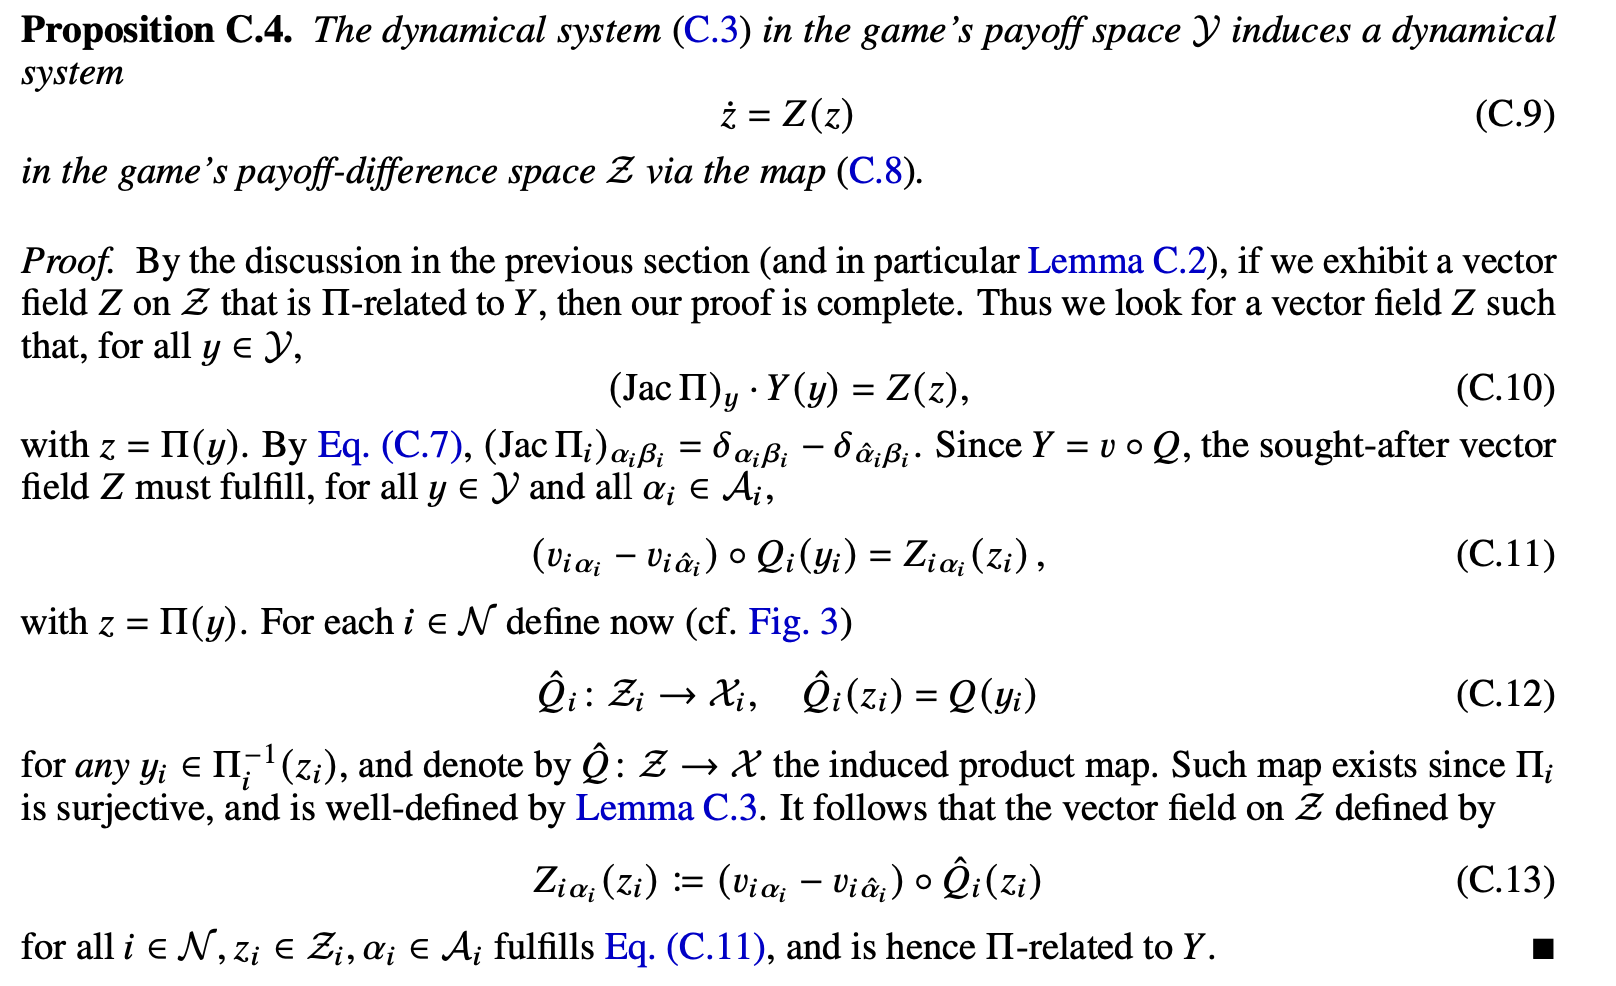

- Denote for simplicity by $V$ and $Q$ the respective objects in $Z$, i.e. $V = V_{.} - V_{.}$ and $Q$ descended to quotient

### FTRL: morally, pull-back and sharp!  $\dot{z} = [Q^{\ast}V]^{\sharp}  (z) = \text{Jac}Q^{-1}(z) \text{Jac}Q(z) \cdot V \circ Q(z)  =  V \circ Q(z)  $


### Pulled FTRL:  $\dot{z} = (Q^{\ast}V)(z) = \text{Jac}Q(z) \cdot V \circ Q(z)   $

## Symplectic corrections

### $\dot{z} = V \circ Q + \lambda [d(V \circ Q)] (V \circ Q)$ converges in spherical; "Euclidean"

### $\dot{z} = V \circ Q + \lambda \big[[d (Q^{\ast}V)](V \circ Q)\big]^{\sharp} $ converges in spherical "Riemannian V1"

### $\dot{z} = Q^{\ast}V(z) + \lambda \big[[d (Q^{\ast}V)](V \circ Q)\big]^{\sharp}$ geometrically not consistent but seems to convege very fast _[careful! May oscillate less, but also move slower]_ on spherical, slow on potential "Riemannian V2"

> The "pulled" or "Riemannian V2" version is geometrically not consistent, but not big deal; qualitatively, it behaves like the standard FTRL (in vanilla or symplectic or optimistic versions)
As a rule of thumb, it oscillates less and moves much slower than the standard FTRL version.
This means that in potential scenarios it converges much slower; in harmonic scenarios, it rotates much slower (vanilla) and converges slower but with less oscillation (optimistic - symplectic)

**Legendre for simplicity; everything goes to quotient**

Ok: note that pull-back of $g$ via $Q$, that is metric in $Y$, _is_ $g^{-1}$
- $Q : Y \to X$
- $Q = \nabla h^{\ast} = (\nabla h)^{-1}$
- $JQ = \text{hess~}{h^{\ast}} = (\text{hess~}h)^{-1}$
- $g = \text{hess~}h = (JQ)^{-1}$
- $g^{-1} = JQ$
- $Q^{\ast}g = J^TQ \cdot g \cdot JQ = JQ \cdot (JQ)^{-1} \cdot JQ = g^{-1}$
- Hence sharping in $Y$ happens with $(Q^{\ast}g)^{-1} = g = (JQ)^{-1} $





## ODE

In [58]:
import random
time = np.linspace(0, 100, 1000)
num_orbits = 4

initial_dual_points = [[random.uniform(-3, 3) for _ in range(4)] for n in range(num_orbits)]
#initial_dual_points = [ [2, 2.5, 2.1, 2.4] ]

In [59]:
initial_dual_points

[[0.22249048160226081,
  2.425298780319018,
  2.4340211139813217,
  -2.724965856939329],
 [1.8406324889583026,
  2.6718992757325184,
  2.869753538223243,
  -2.736652092152133],
 [2.02505416703897,
  -0.8298875223156088,
  1.5341803283050899,
  -1.513373027569097],
 [0.84300412942188, 2.71349384201463, -2.253641369277041, 1.9331462788142773]]

In [60]:
initial_quot_points = [nfg.Utils.flatten(nfg.Utils.quotient(nfg.Utils.pack( y, skeleton ))) for y in initial_dual_points]
initial_quot_points

[[0.0, 2.202808298716757, 0.0, -5.158986970920651],
 [0.0, 0.8312667867742158, 0.0, -5.6064056303753755],
 [0.0, -2.854941689354579, 0.0, -3.0475533558741867],
 [0.0, 1.8704897125927502, 0.0, 4.186787648091318]]

In [61]:
initial_eff_quot_points = [nfg.Utils.flatten( [ z[1:] for z in nfg.Utils.quotient(nfg.Utils.pack( y, skeleton )) ] ) for y in initial_dual_points]
initial_eff_quot_points

[[2.202808298716757, -5.158986970920651],
 [0.8312667867742158, -5.6064056303753755],
 [-2.854941689354579, -3.0475533558741867],
 [1.8704897125927502, 4.186787648091318]]

## finite games $\to$ constrained setting & entropic regularizer

In [62]:
def plot_method(ax1, ax2, dual_points, ftrl):
        primal_points = [ftrl.choice(*y) for y in dual_points]
    
        x00, x01, x10, x11 = coords_points(primal_points) # primal coords
        y00, y01, y10, y11 = coords_points(dual_points) # dual coords
    
        ax1.plot(x01[-1], x11[-1], 'ro', label = 'final')
        ax1.plot(x01, x11, 'k')
        ax1.plot(x01[0], x11[0], 'bo', label = 'initial')

        ax2.plot(y01[-1], y11[-1], 'ro', label = 'final')
        ax2.plot(y01, y11, 'k')
        ax2.plot(y01[0], y11[0], 'bo', label = 'initial')
        
        ax1.set_xlim(0,1)
        ax1.set_ylim(0,1)

In [63]:
def plot_Zmethod(ax1, ax2, quot_points, ftrl):
        primal_points = [ftrl.choice(*z) for z in quot_points]
    
        x00, x01, x10, x11 = coords_points(primal_points) # primal coords
        z00, z01, z10, z11 = coords_points(quot_points) # quot coords
    
        ax1.plot(x01[-1], x11[-1], 'ro', label = 'final')
        ax1.plot(x01, x11, 'k')
        ax1.plot(x01[0], x11[0], 'bo', label = 'initial')

        ax2.plot(z01[-1], z11[-1], 'ro', label = 'final')
        ax2.plot(z01, z11, 'k')
        ax2.plot(z01[0], z11[0], 'bo', label = 'initial')
        
        ax1.set_xlim(0,1)
        ax1.set_ylim(0,1)

In [64]:
def plot_effZmethod(ax1, ax2, quot_points, ftrl):
        primal_points = [ftrl.choice(*z) for z in quot_points]
    
        x01, x11 = coords_points(primal_points) # primal coords
        z01, z11 = coords_points(quot_points) # quot coords
    
        ax1.plot(x01[-1], x11[-1], 'ro', label = 'final')
        ax1.plot(x01, x11, 'k')
        ax1.plot(x01[0], x11[0], 'bo', label = 'initial')

        ax2.plot(z01[-1], z11[-1], 'ro', label = 'final')
        ax2.plot(z01, z11, 'k')
        ax2.plot(z01[0], z11[0], 'bo', label = 'initial')
        
        ax1.set_xlim(0,1)
        ax1.set_ylim(0,1)

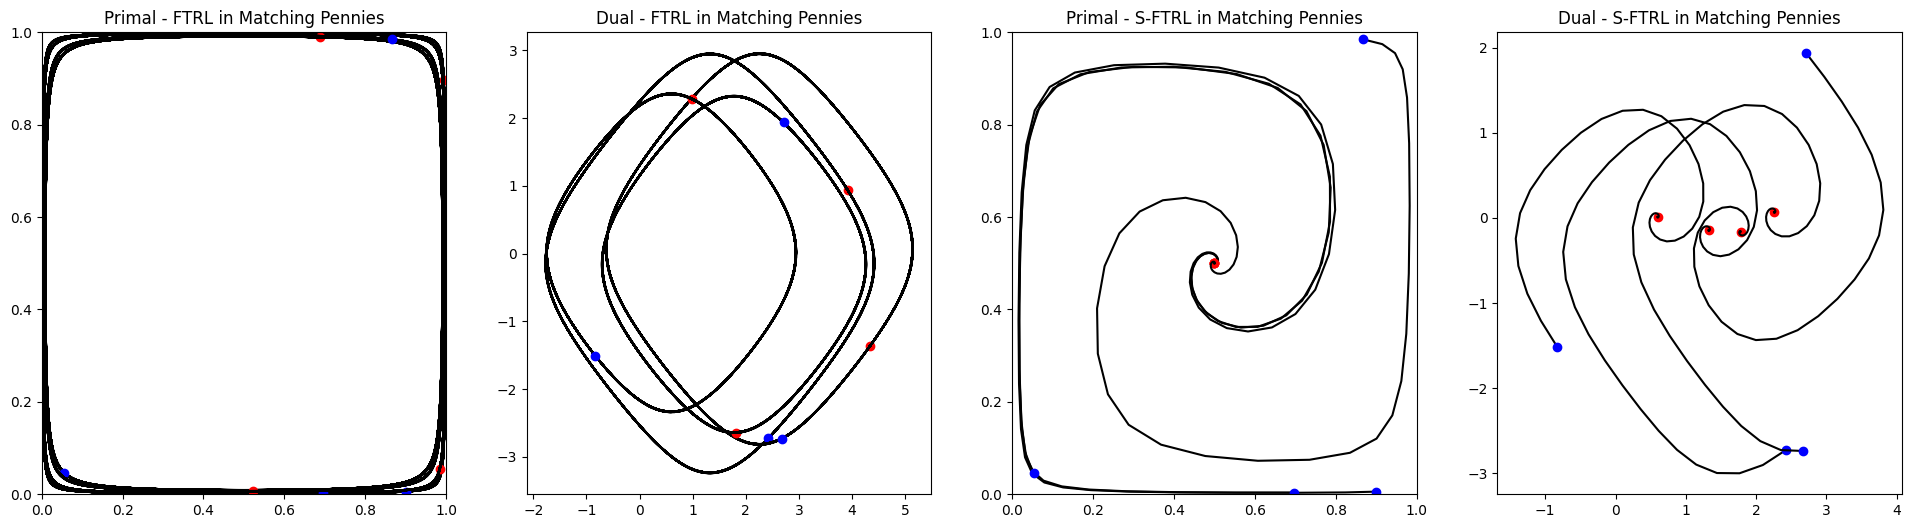

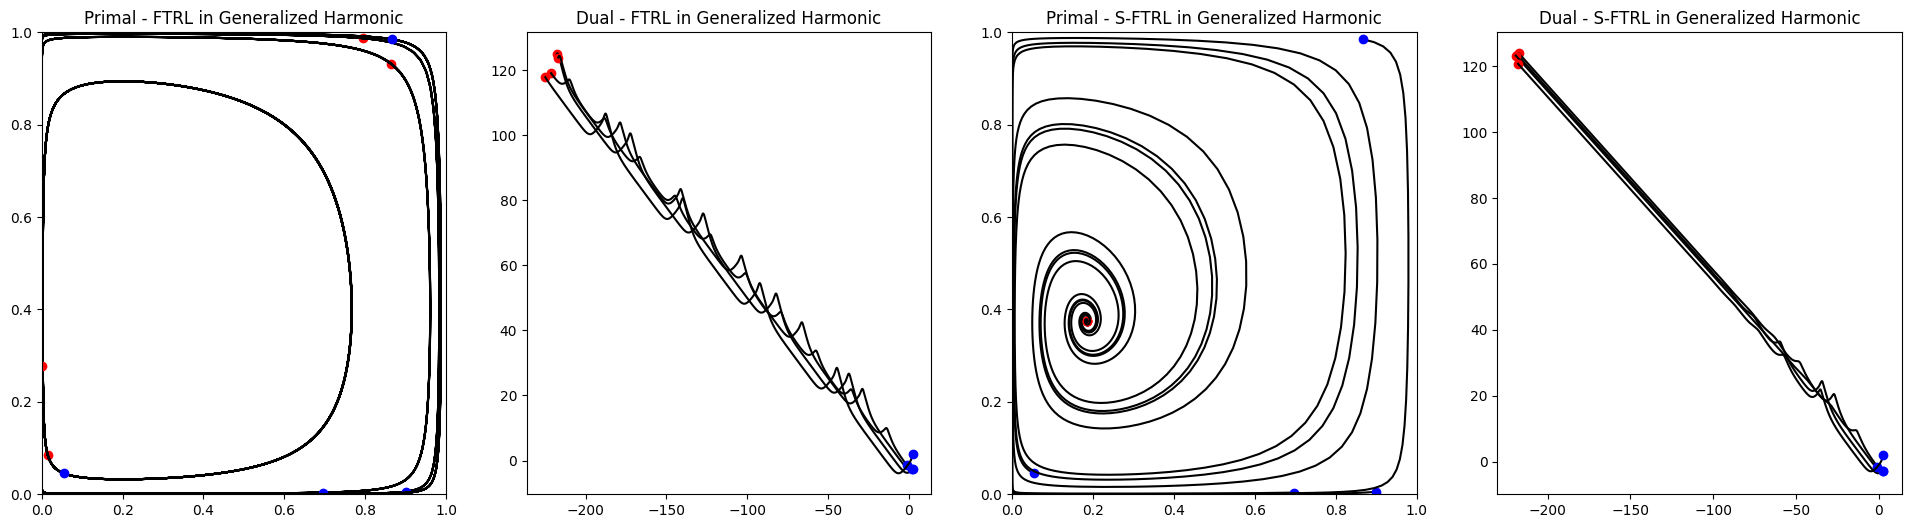

<lambdifygenerated-12>:2: RuntimeWarning: overflow encountered in scalar multiply
  return [((3*exp(y0_0) + exp(y0_1))*(2*(exp(y0_0) + exp(y0_1))**2*exp(y1_0 + y1_1) + 3*(exp(y0_0) + exp(y0_1))*(exp(y1_0) + exp(y1_1))**2*exp(y0_0) - (3*exp(y0_0) + exp(y0_1))*(exp(y1_0) + exp(y1_1))**2*exp(y0_0)) + 4*(-(exp(y0_0) + exp(y0_1))**2*(exp(y1_0) + exp(y1_1))*exp(y1_0) + (exp(y0_0) + exp(y0_1))**2*exp(2*y1_0) + (exp(y0_0) + exp(y0_1))*(exp(y1_0) + exp(y1_1))**2*exp(y0_0) - (exp(y1_0) + exp(y1_1))**2*exp(2*y0_0))*exp(y0_0))/((exp(y0_0) + exp(y0_1))**3*(exp(y1_0) + exp(y1_1))**2), -2*exp(y0_0 + 2*y0_1)/(exp(y0_0) + exp(y0_1))**3 - 10*exp(2*y0_0 + y0_1)/(exp(y0_0) + exp(y0_1))**3 + 2*exp(y0_0 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)) + 2*exp(y0_1 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)), ((3*exp(y1_0) + exp(y1_1))*(3*(exp(y0_0) + exp(y0_1))**2*(exp(y1_0) + exp(y1_1))*exp(y1_0) - (exp(y0_0) + exp

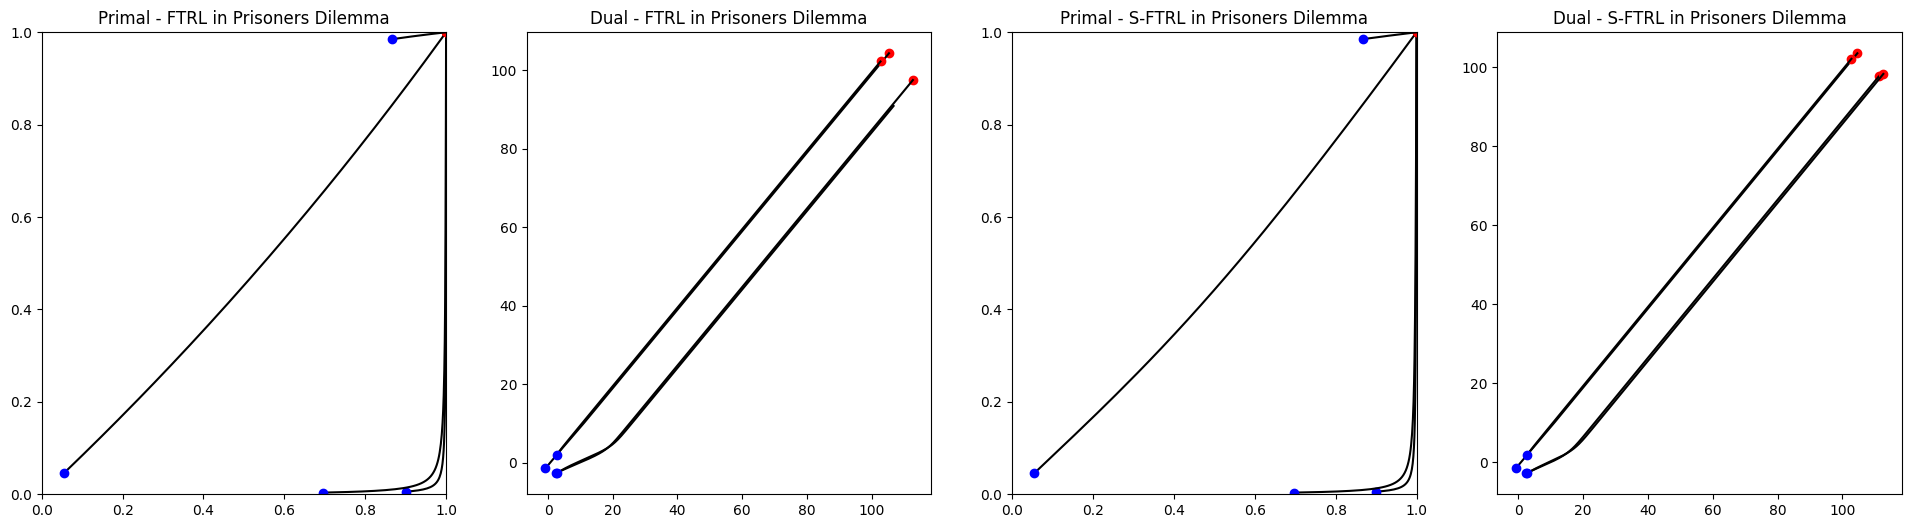

<lambdifygenerated-16>:2: RuntimeWarning: overflow encountered in scalar power
  return [-26*exp(y0_0 + 2*y0_1)/(exp(y0_0) + exp(y0_1))**3 + 35*exp(2*y0_0 + y0_1)/(exp(y0_0) + exp(y0_1))**3 + 24*exp(y0_0 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)) - 20*exp(y0_1 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)), 26*exp(y0_0 + 2*y0_1)/(exp(y0_0) + exp(y0_1))**3 - 35*exp(2*y0_0 + y0_1)/(exp(y0_0) + exp(y0_1))**3 - 18*exp(y0_0 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)) + 15*exp(y0_1 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)), -8*exp(y1_0 + 2*y1_1)/(exp(y1_0) + exp(y1_1))**3 + 17*exp(2*y1_0 + y1_1)/(exp(y1_0) + exp(y1_1))**3 + 24*exp(y0_0 + y0_1 + y1_0)/((exp(y0_0) + exp(y0_1))**2*exp(y1_0) + (exp(y0_0) + exp(y0_1))**2*exp(y1_1)) - 18*exp(y0_0 + y0_1 + y1_1)/((exp(y0_0) + exp(y0_1))**2*exp(y1_0) + (exp

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.8588894616063D+02   r2 =                  NaN


/Users/davidelegacci/RESEARCH/phd/phd-research/phd-code/game_theory_geometry_dynamics/Learning/GameFlow/SymplecticFTRL/symplecticFTRL.py:64: RuntimeWarning: invalid value encountered in multiply
  return np.array( self.VQ(*y) ) + lam * np.array( self.dVQ_VQ(*y) )
/var/folders/nr/_pc5sgrn7833hcljbr9b58680000gn/T/ipykernel_69698/2094114985.py:21: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  corrected_dual_points = odeint(s.sftrl_dyn, y0, time, args = (LAM,))


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.8576590397120D+02   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.9637266440185D+02   r2 =                  NaN


<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in scalar add
  return [-26*exp(y0_0 + 2*y0_1)/(exp(y0_0) + exp(y0_1))**3 + 35*exp(2*y0_0 + y0_1)/(exp(y0_0) + exp(y0_1))**3 + 24*exp(y0_0 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)) - 20*exp(y0_1 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)), 26*exp(y0_0 + 2*y0_1)/(exp(y0_0) + exp(y0_1))**3 - 35*exp(2*y0_0 + y0_1)/(exp(y0_0) + exp(y0_1))**3 - 18*exp(y0_0 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)) + 15*exp(y0_1 + y1_0 + y1_1)/((exp(y1_0) + exp(y1_1))**2*exp(y0_0) + (exp(y1_0) + exp(y1_1))**2*exp(y0_1)), -8*exp(y1_0 + 2*y1_1)/(exp(y1_0) + exp(y1_1))**3 + 17*exp(2*y1_0 + y1_1)/(exp(y1_0) + exp(y1_1))**3 + 24*exp(y0_0 + y0_1 + y1_0)/((exp(y0_0) + exp(y0_1))**2*exp(y1_0) + (exp(y0_0) + exp(y0_1))**2*exp(y1_1)) - 18*exp(y0_0 + y0_1 + y1_1)/((exp(y0_0) + exp(y0_1))**2*exp(y1_0) + (

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.8663699346429D+02   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.8609902154007D+02   r2 =                  NaN


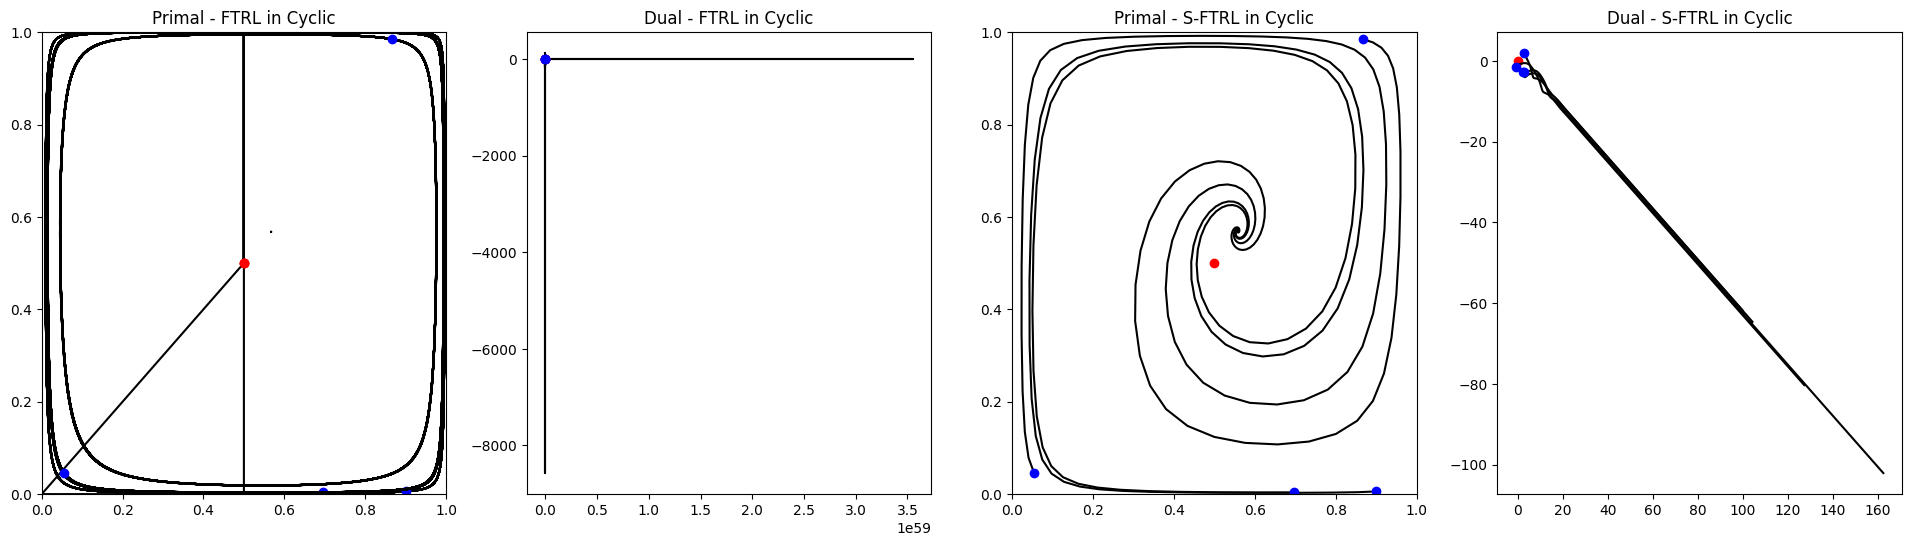

In [65]:
# X and Y

LAM = -0.1

for i, s in enumerate(SFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 4, 1)
    ax2 = fig.add_subplot(1, 4, 2)
    ax3 = fig.add_subplot(1, 4, 3)
    ax4 = fig.add_subplot(1, 4, 4)
    
    for y0 in initial_dual_points:

        dual_points = odeint(s.sftrl_dyn, y0, time, args = (0,))
        plot_method(ax1, ax2, dual_points, s)
        ax1.set_title(f'Primal - FTRL in {s.name}')
        ax2.set_title(f'Dual - FTRL in {s.name}')

        corrected_dual_points = odeint(s.sftrl_dyn, y0, time, args = (LAM,))
        plot_method(ax3, ax4, corrected_dual_points, s)
        ax3.set_title(f'Primal - S-FTRL in {s.name}')
        ax4.set_title(f'Dual - S-FTRL in {s.name}')

    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


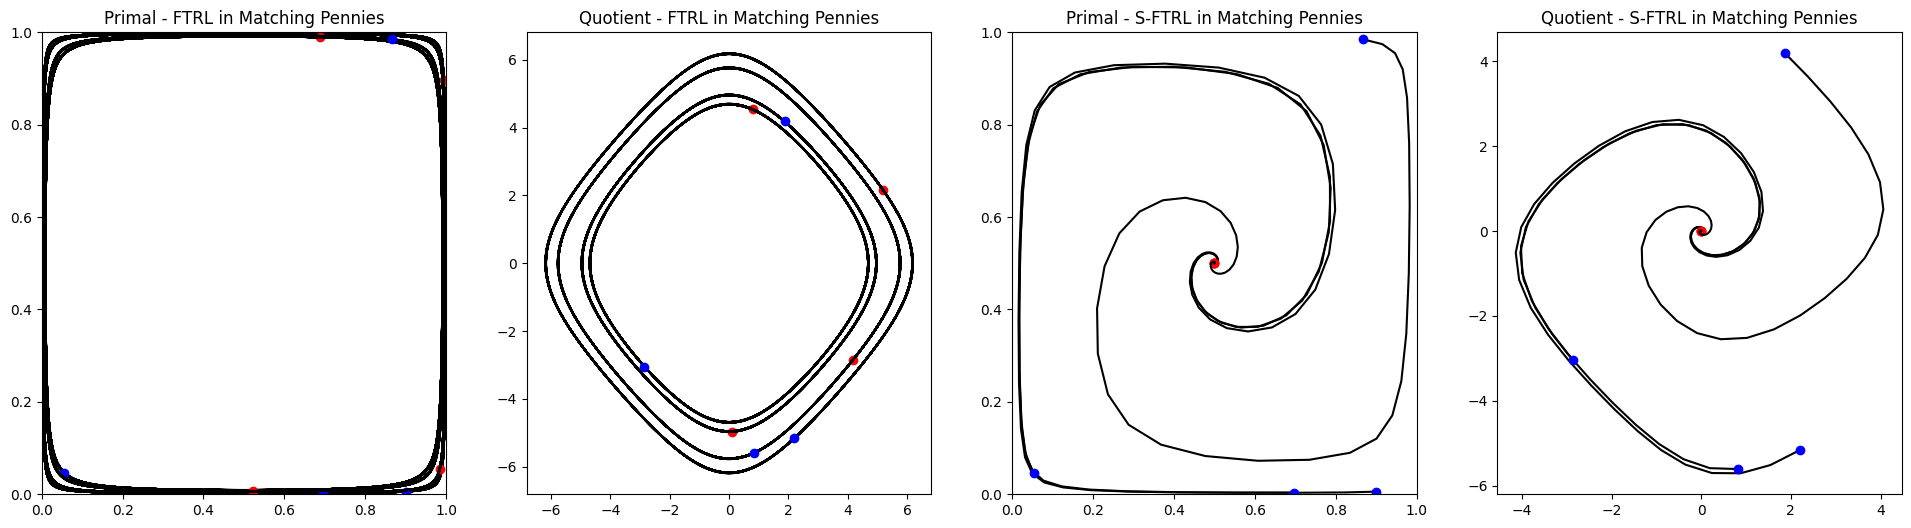

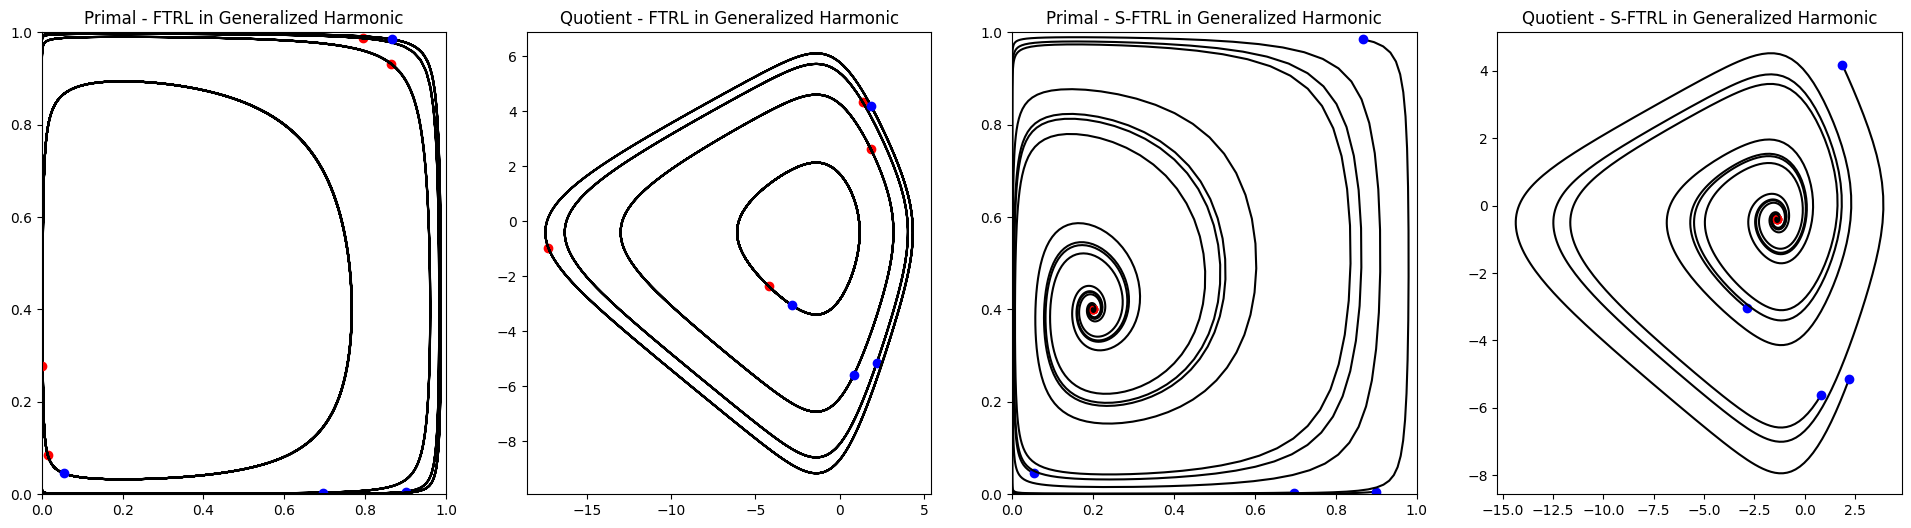

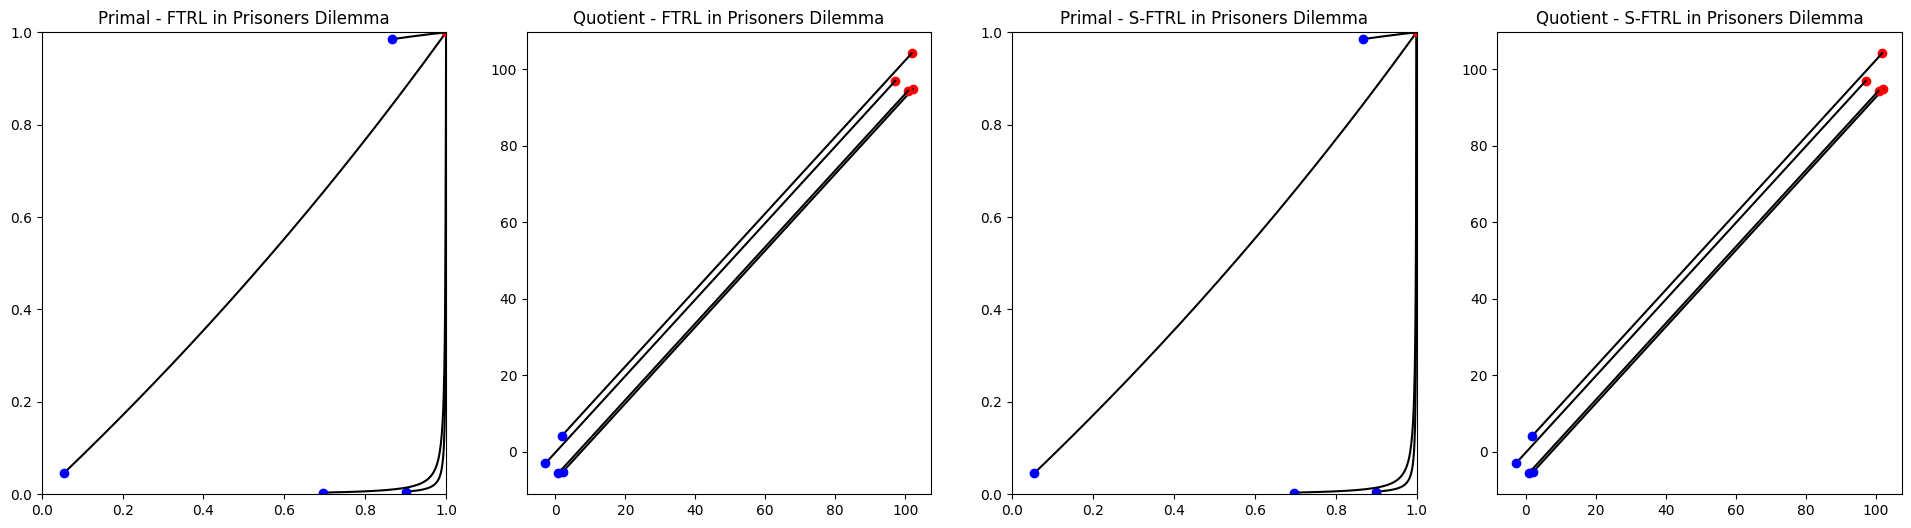

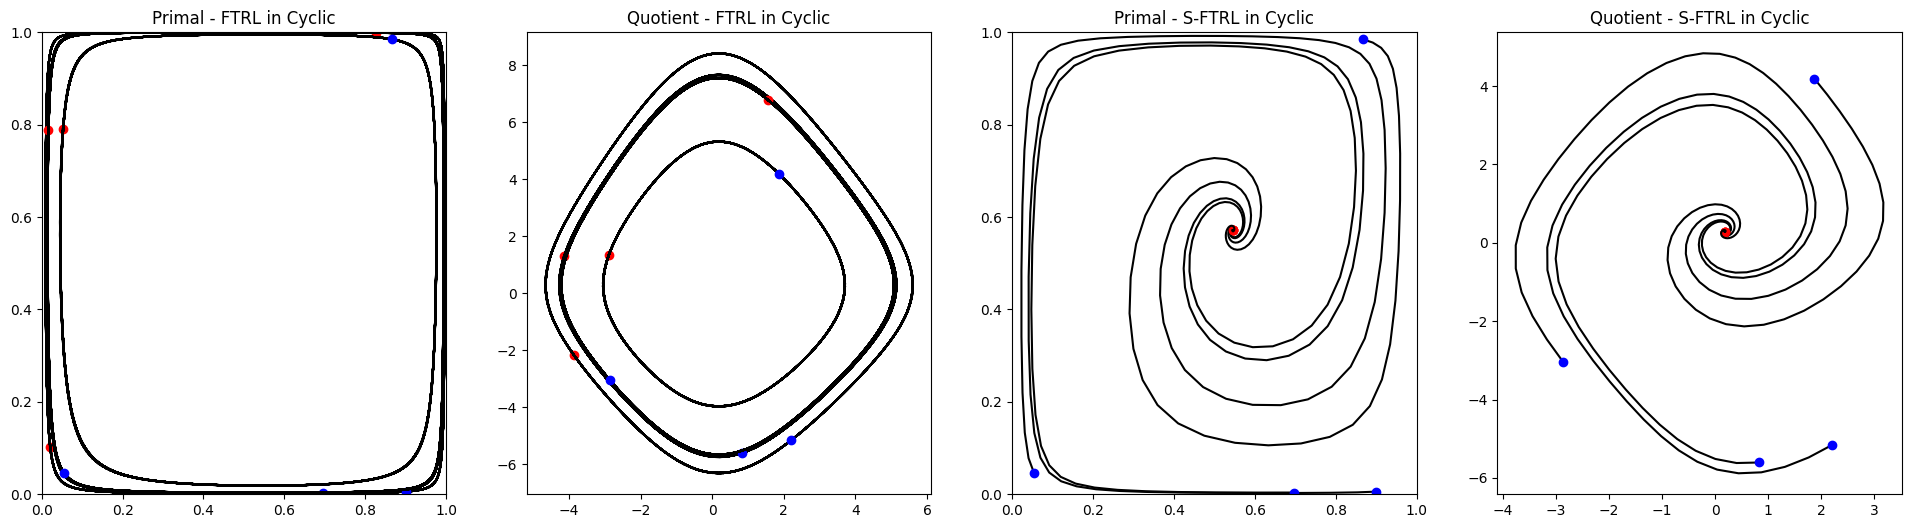

In [66]:
# X and Z, full

LAM = -0.1

for i, s in enumerate(ZSFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 4, 1)
    ax2 = fig.add_subplot(1, 4, 2)
    ax3 = fig.add_subplot(1, 4, 3)
    ax4 = fig.add_subplot(1, 4, 4)
    
    for z0 in initial_quot_points:

        quot_points = odeint(s.sftrl_dyn, z0, time, args = (0,))
        plot_Zmethod(ax1, ax2, quot_points, s)
        ax1.set_title(f'Primal - FTRL in {s.name}')
        ax2.set_title(f'Quotient - FTRL in {s.name}')

        corrected_quot_points = odeint(s.sftrl_dyn, z0, time, args = (LAM,))
        plot_Zmethod(ax3, ax4, corrected_quot_points, s)
        ax3.set_title(f'Primal - S-FTRL in {s.name}')
        ax4.set_title(f'Quotient - S-FTRL in {s.name}')

    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


In [67]:
eff_ZSFTRL_GAMES

In [68]:
initial_eff_quot_points

[[2.202808298716757, -5.158986970920651],
 [0.8312667867742158, -5.6064056303753755],
 [-2.854941689354579, -3.0475533558741867],
 [1.8704897125927502, 4.186787648091318]]

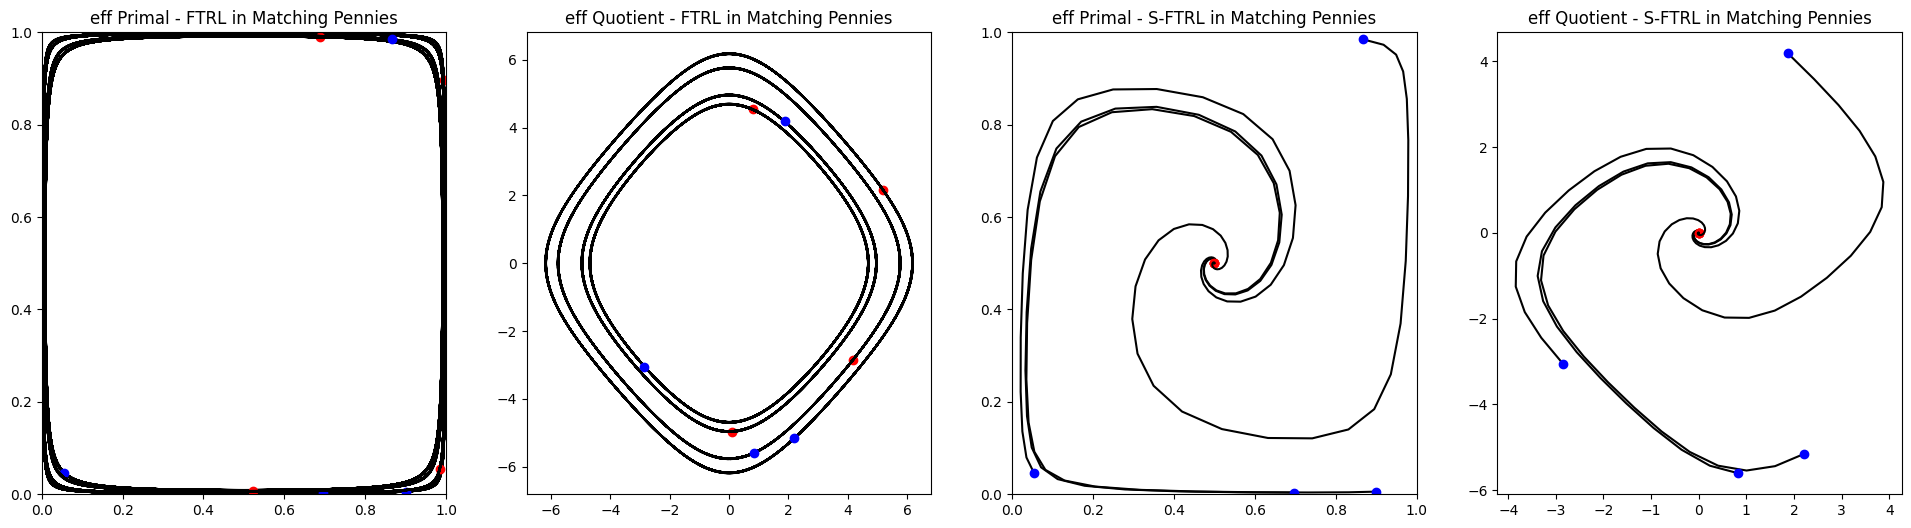

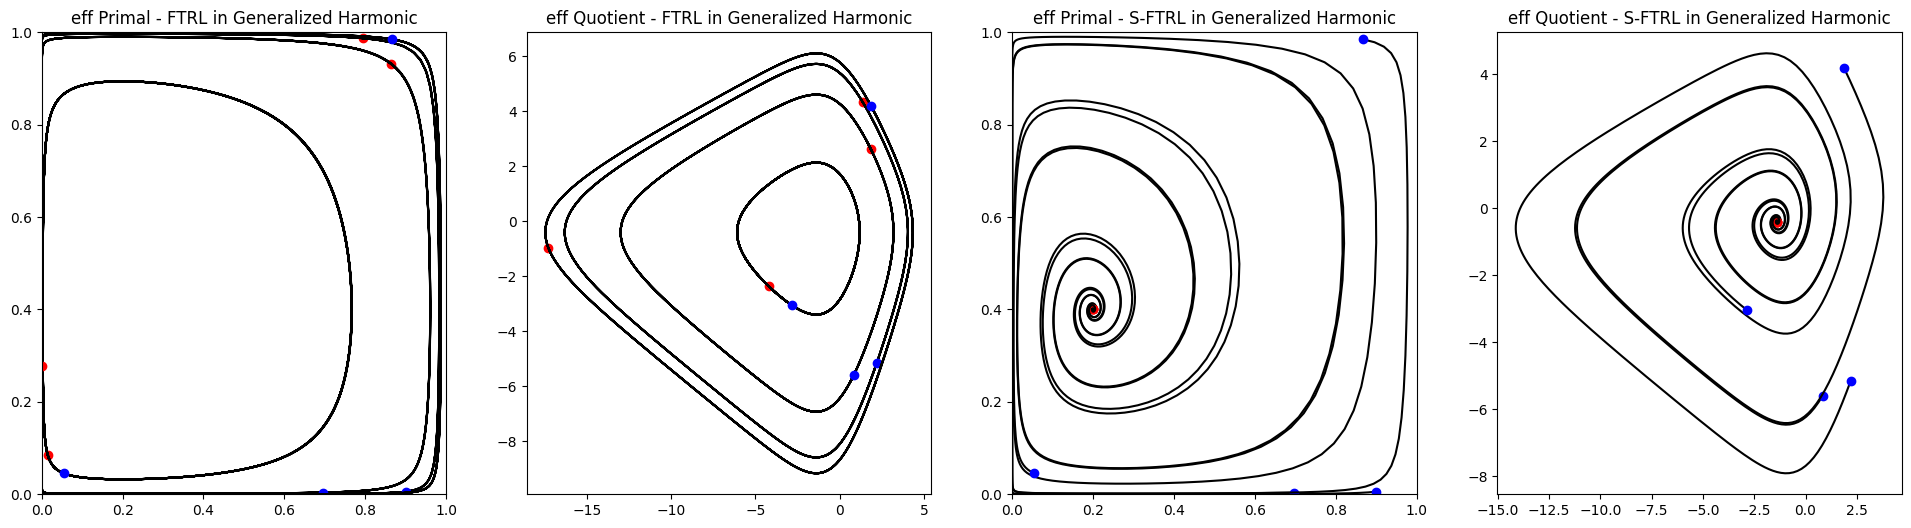

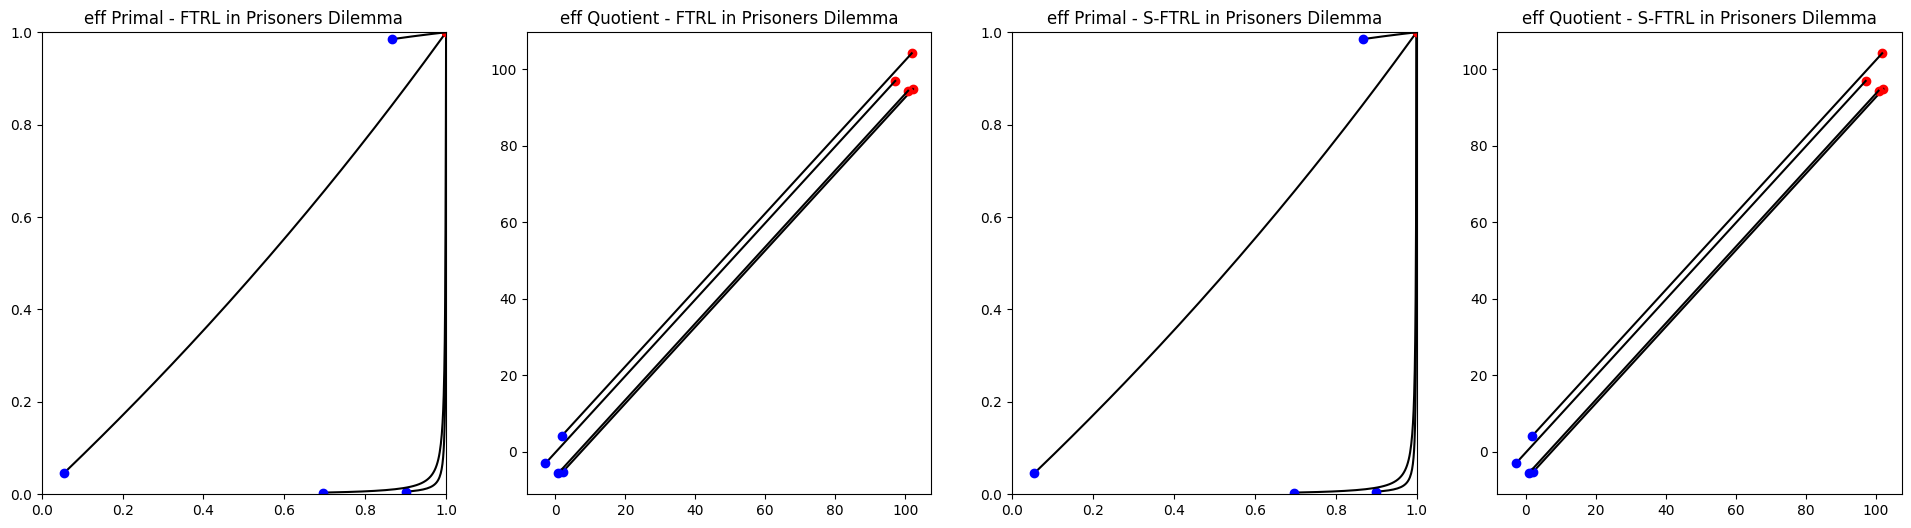

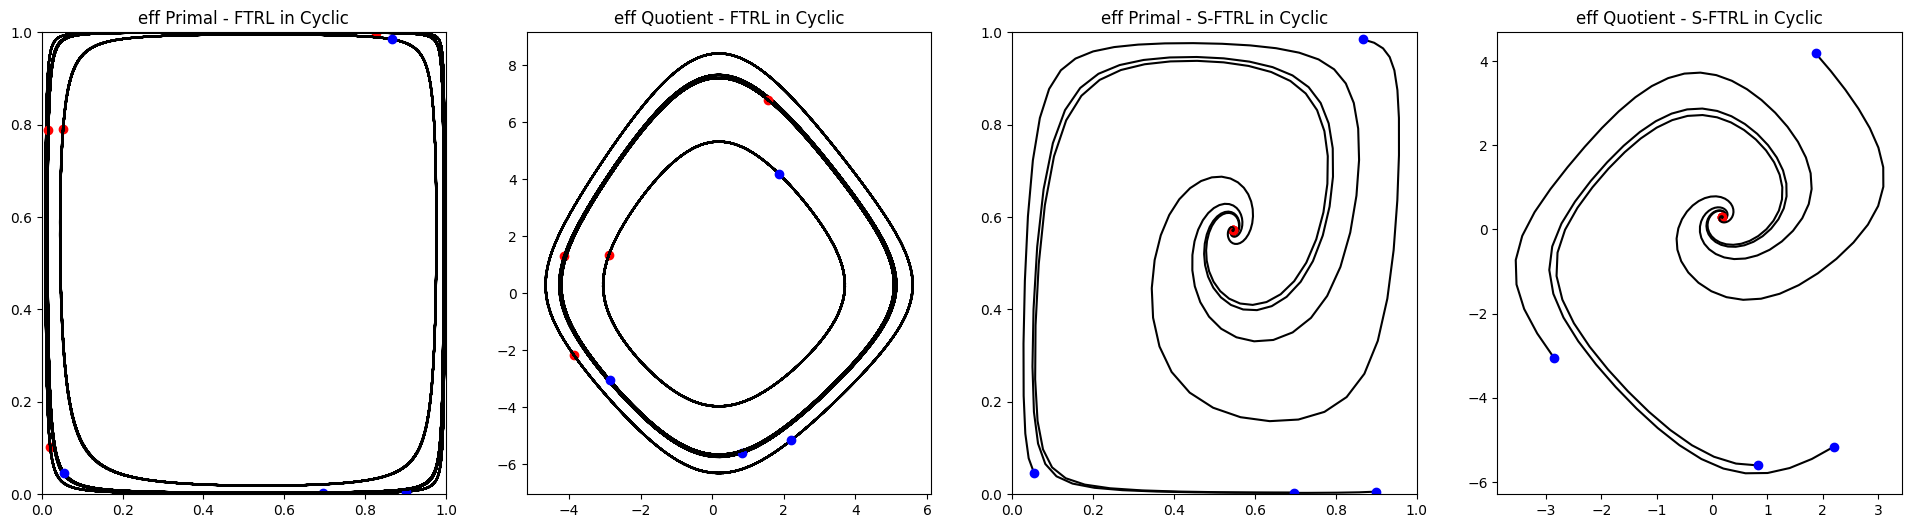

In [69]:
# X and Z effective, ftrl vs symplectic ftrl geometric version

LAM = -0.1

for i, s in enumerate(eff_ZSFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 4, 1)
    ax2 = fig.add_subplot(1, 4, 2)
    ax3 = fig.add_subplot(1, 4, 3)
    ax4 = fig.add_subplot(1, 4, 4)
    
    for z0 in initial_eff_quot_points:

        eff_quot_points = odeint(s.geom_sftrl_dyn, z0, time, args = (0,))
        plot_effZmethod(ax1, ax2, eff_quot_points, s)
        ax1.set_title(f'eff Primal - FTRL in {s.name}')
        ax2.set_title(f'eff Quotient - FTRL in {s.name}')

        corrected_eff_quot_points = odeint(s.geom_sftrl_dyn, z0, time, args = (LAM,))
        plot_effZmethod(ax3, ax4, corrected_eff_quot_points, s)
        ax3.set_title(f'eff Primal - S-FTRL in {s.name}')
        ax4.set_title(f'eff Quotient - S-FTRL in {s.name}')

    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


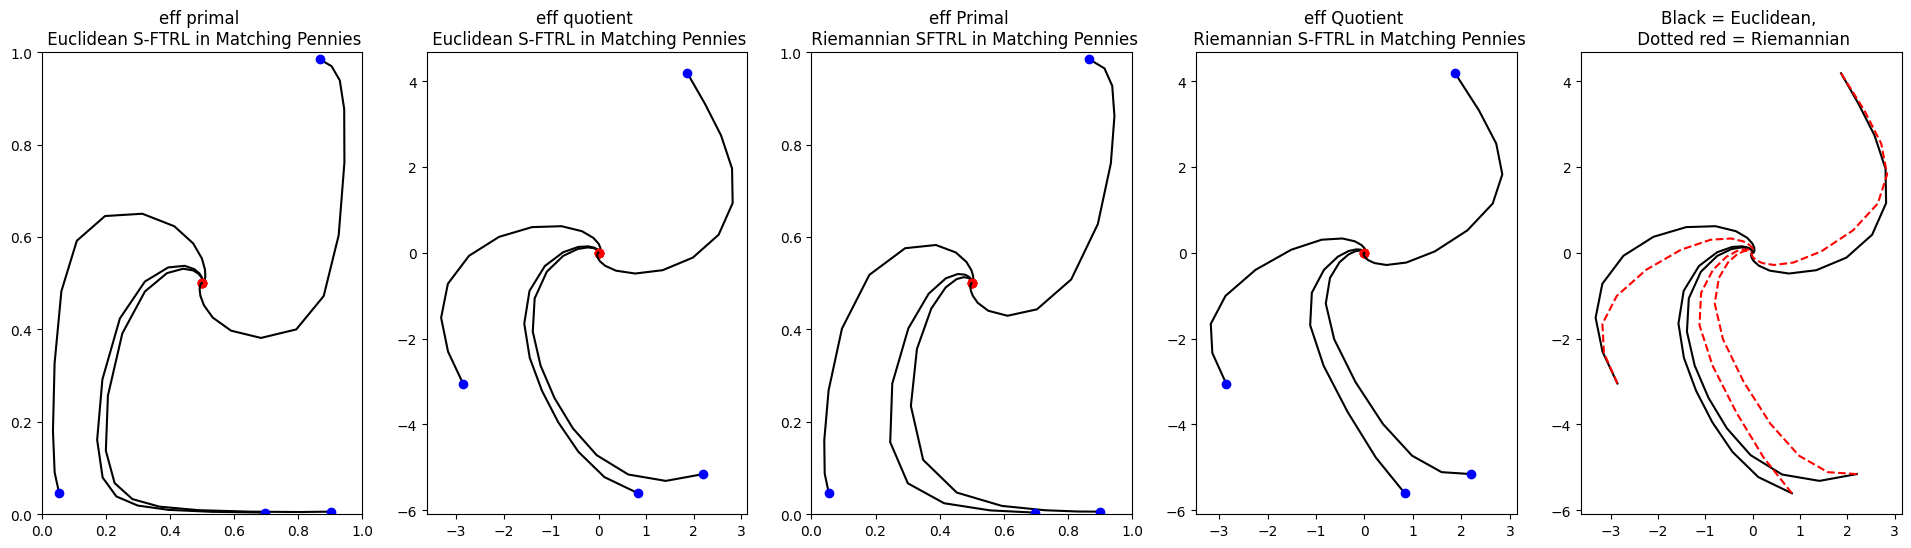

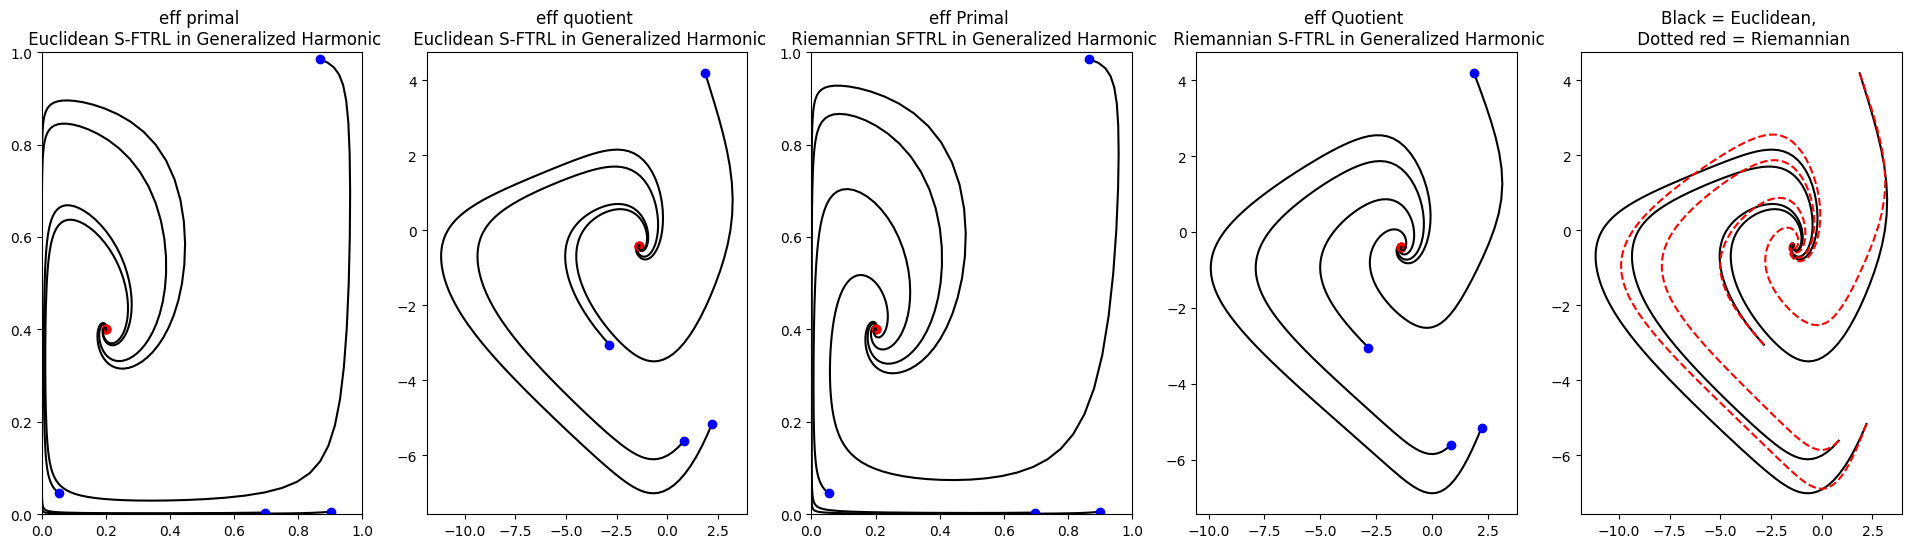

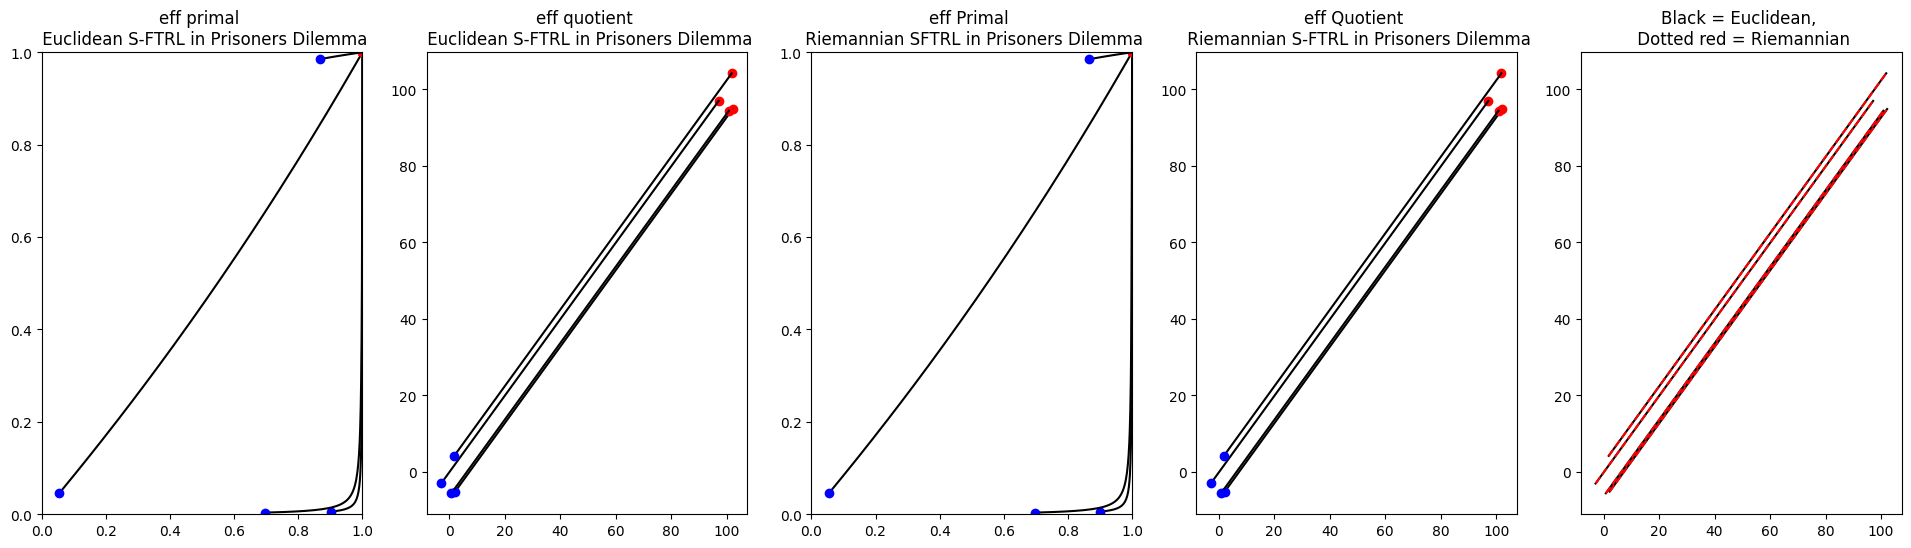

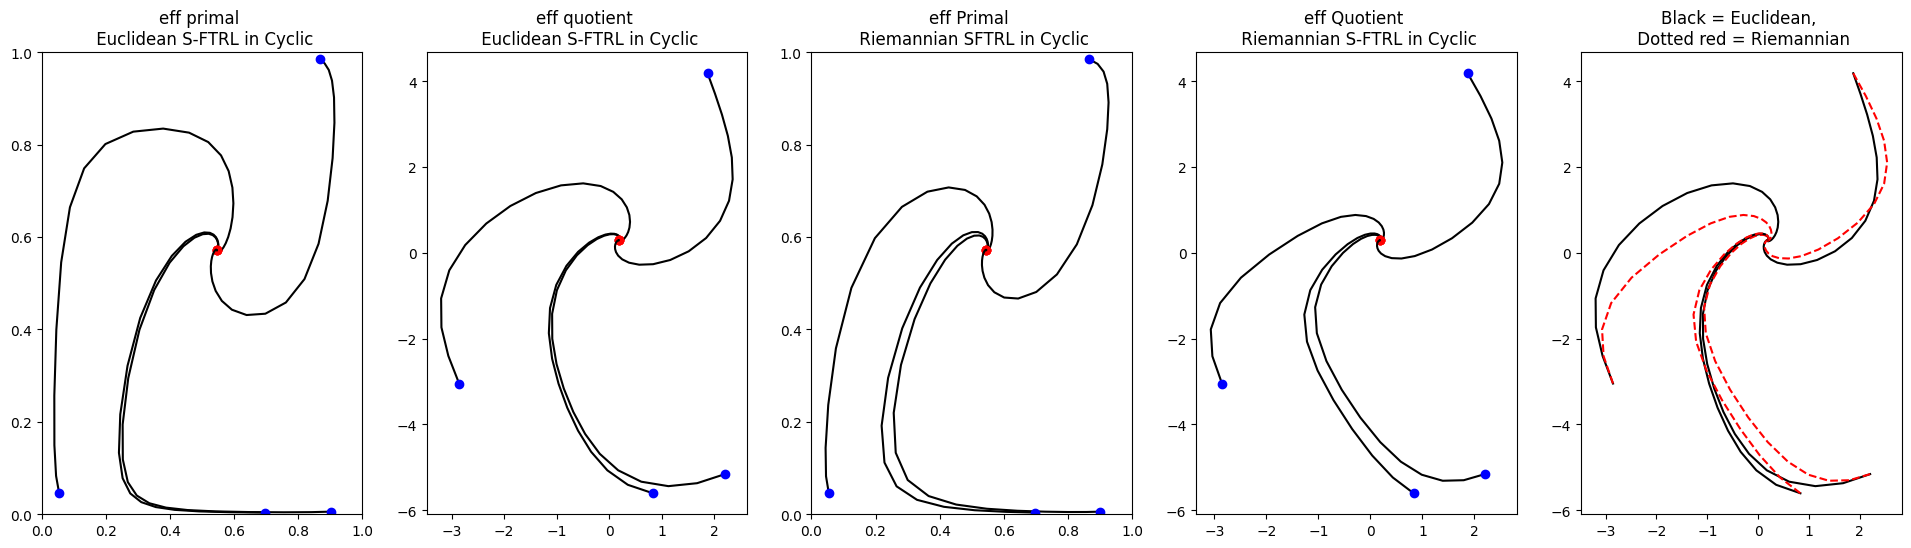

In [70]:
# X and Z effective, symplectic vs geometric symplectic

LAM = -0.3

for i, s in enumerate(eff_ZSFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 5, 1)
    ax2 = fig.add_subplot(1, 5, 2)
    ax3 = fig.add_subplot(1, 5, 3)
    ax4 = fig.add_subplot(1, 5, 4)
    ax5 = fig.add_subplot(1, 5, 5)
    
    for z0 in initial_eff_quot_points:

        eu_eff_quot_points = odeint(s.sftrl_dyn, z0, time, args = (LAM,))
        plot_effZmethod(ax1, ax2, eu_eff_quot_points, s)
        ax1.set_title(f'eff primal \n Euclidean S-FTRL in {s.name}')
        ax2.set_title(f'eff quotient \n Euclidean S-FTRL in {s.name}')

        riem_eff_quot_points = odeint(s.geom_sftrl_dyn, z0, time, args = (LAM,))
        plot_effZmethod(ax3, ax4, riem_eff_quot_points, s)
        ax3.set_title(f'eff Primal \n Riemannian SFTRL in {s.name}')
        ax4.set_title(f'eff Quotient \n Riemannian S-FTRL in {s.name}')
        
        points_diff = eu_eff_quot_points - riem_eff_quot_points
        ax5.plot( *coords_points(eu_eff_quot_points), 'k')
        ax5.plot( *coords_points(riem_eff_quot_points), '--r')
        ax5.set_title('Black = Euclidean, \n Dotted red = Riemannian' )

    

    #plt.legend(loc = 'best')
    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


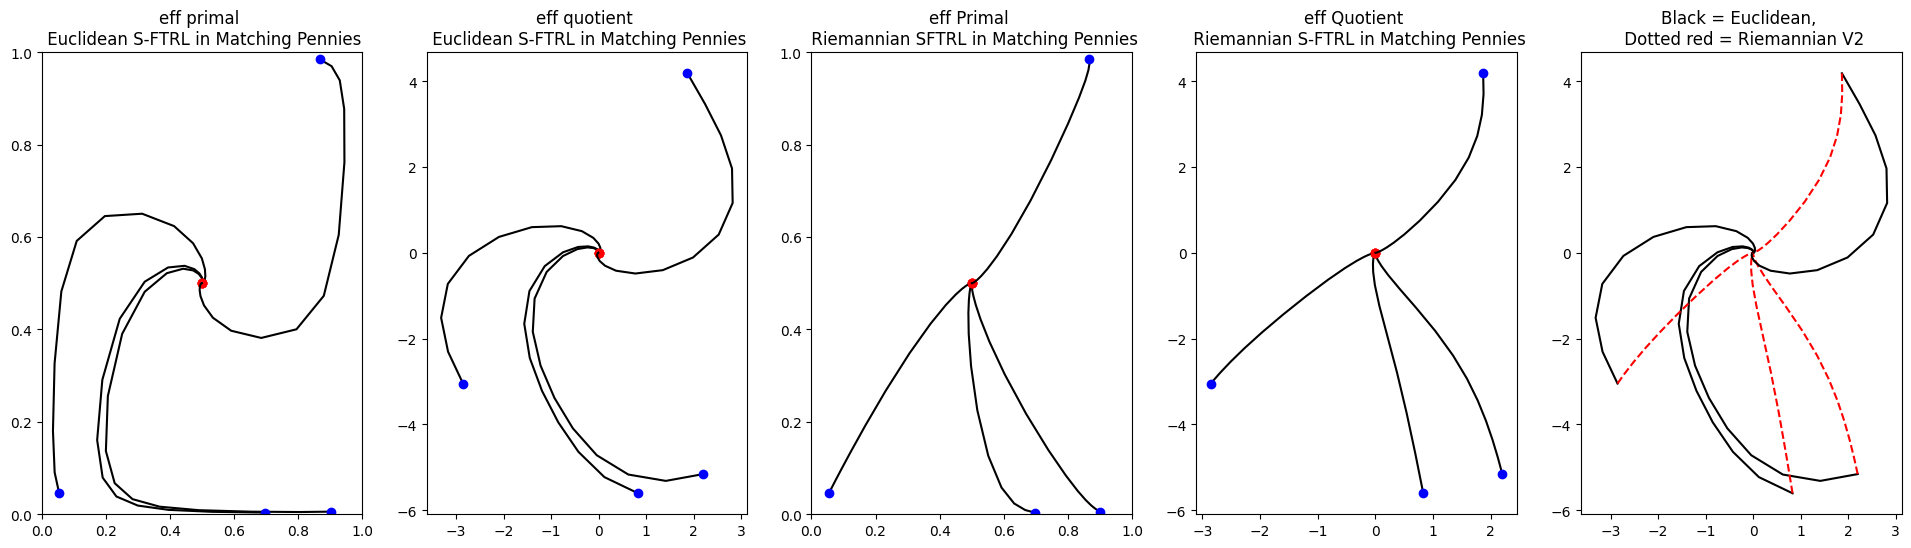

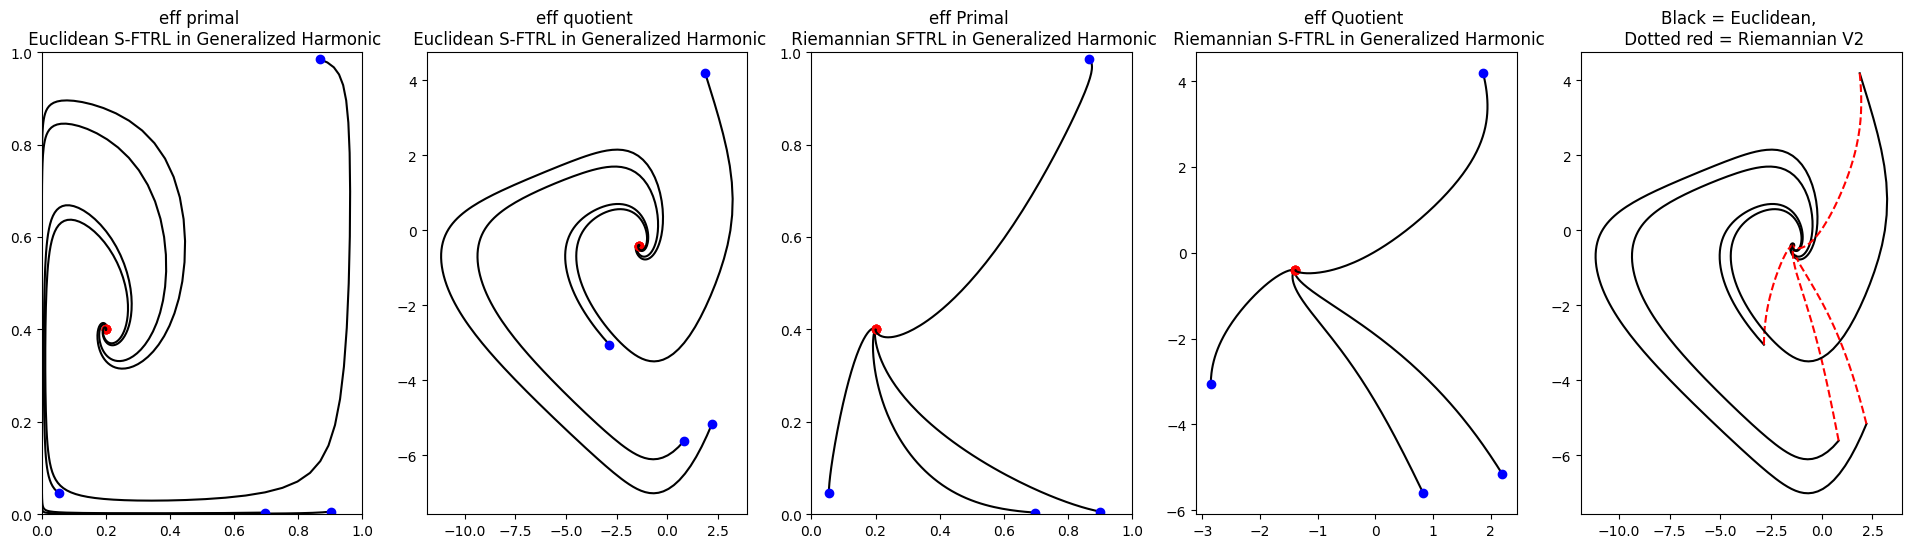

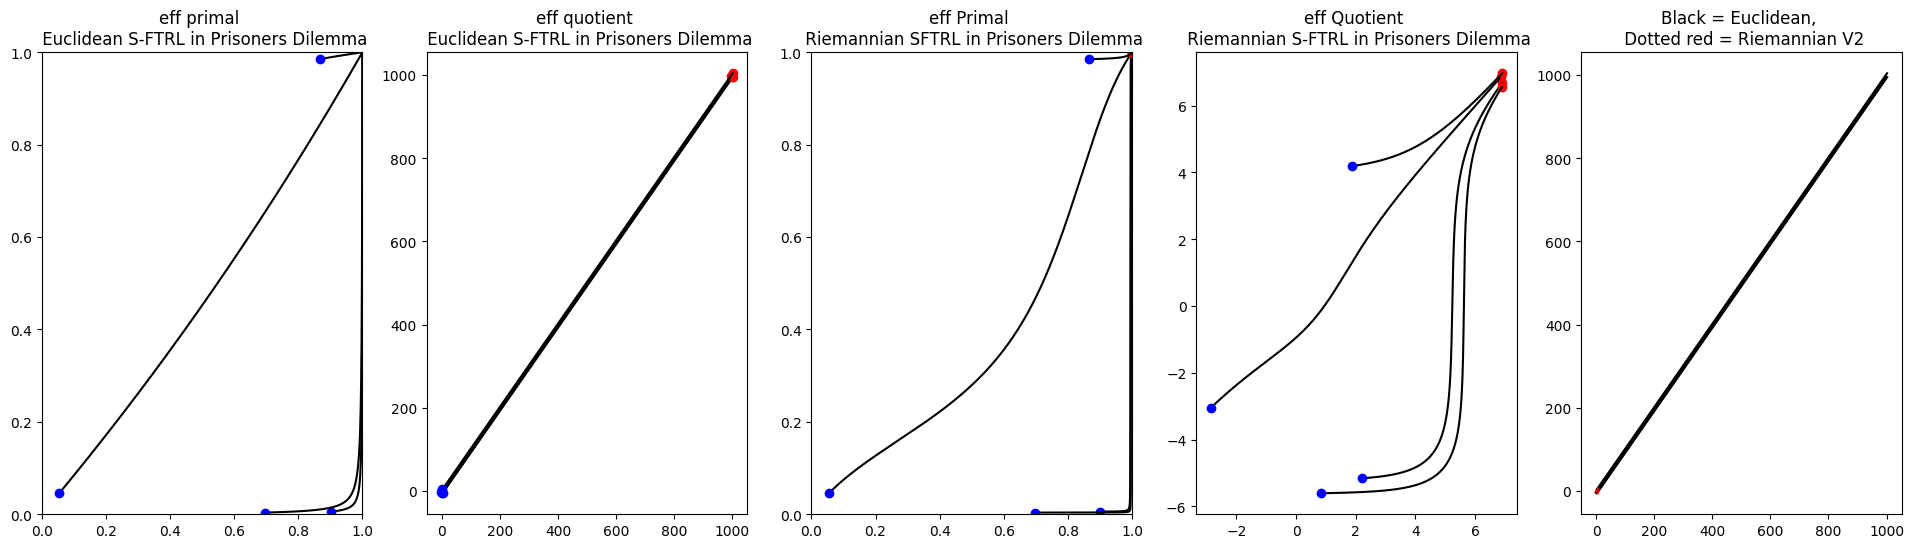

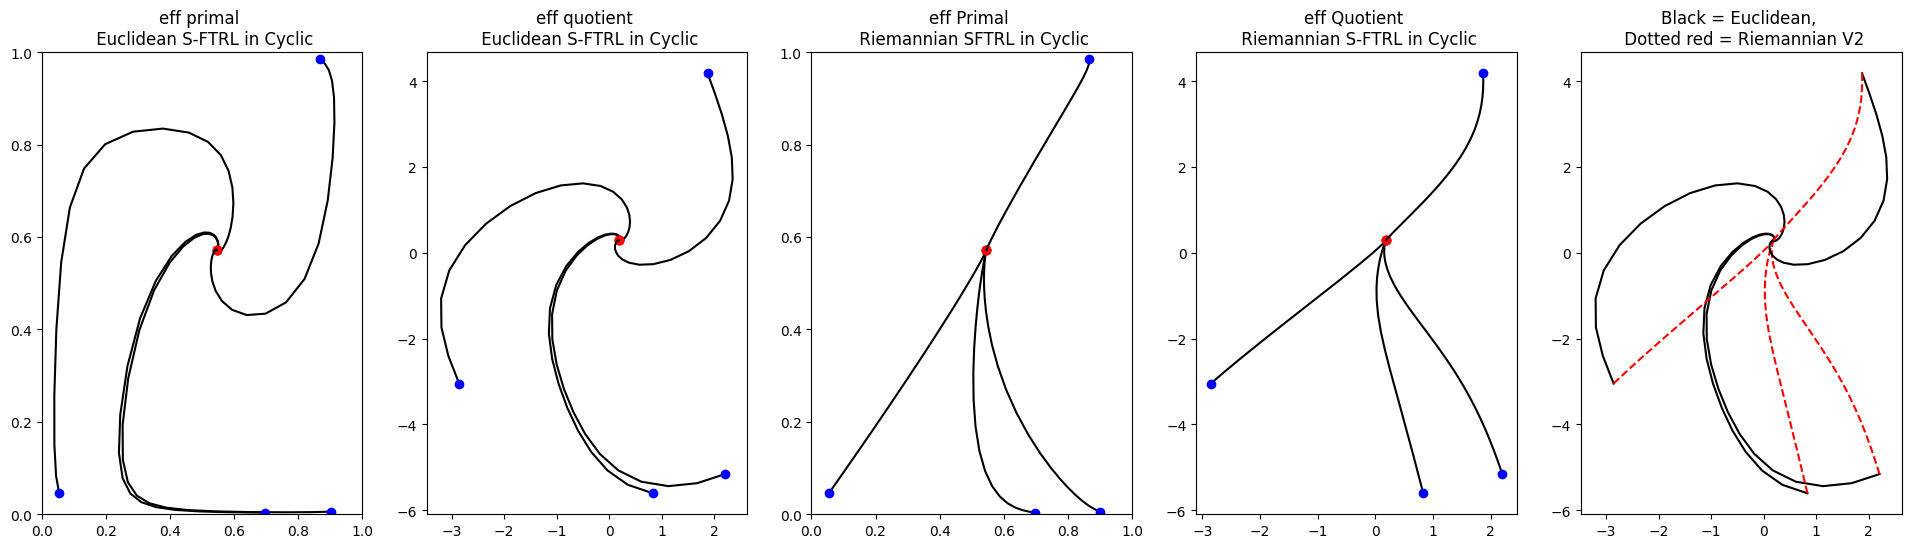

In [92]:
# X and Z effective, symplectic vs geometric symplectic VERSION 2 pulling also first term

time = np.linspace(0, 1000, 10000)

LAM = -0.3

for i, s in enumerate(eff_ZSFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 5, 1)
    ax2 = fig.add_subplot(1, 5, 2)
    ax3 = fig.add_subplot(1, 5, 3)
    ax4 = fig.add_subplot(1, 5, 4)
    ax5 = fig.add_subplot(1, 5, 5)
    
    for z0 in initial_eff_quot_points:

        eu_eff_quot_points = odeint(s.sftrl_dyn, z0, time, args = (LAM,))
        plot_effZmethod(ax1, ax2, eu_eff_quot_points, s)
        ax1.set_title(f'eff primal \n Euclidean S-FTRL in {s.name}')
        ax2.set_title(f'eff quotient \n Euclidean S-FTRL in {s.name}')

        riem_eff_quot_points = odeint(s.geom_sftrl_dyn_2, z0, time, args = (LAM,))
        plot_effZmethod(ax3, ax4, riem_eff_quot_points, s)
        ax3.set_title(f'eff Primal \n Riemannian SFTRL in {s.name}')
        ax4.set_title(f'eff Quotient \n Riemannian S-FTRL in {s.name}')
        
        points_diff = eu_eff_quot_points - riem_eff_quot_points
        ax5.plot( *coords_points(eu_eff_quot_points), 'k')
        ax5.plot( *coords_points(riem_eff_quot_points), '--r')
        ax5.set_title('Black = Euclidean, \n Dotted red = Riemannian V2' )

    

    #plt.legend(loc = 'best')
    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


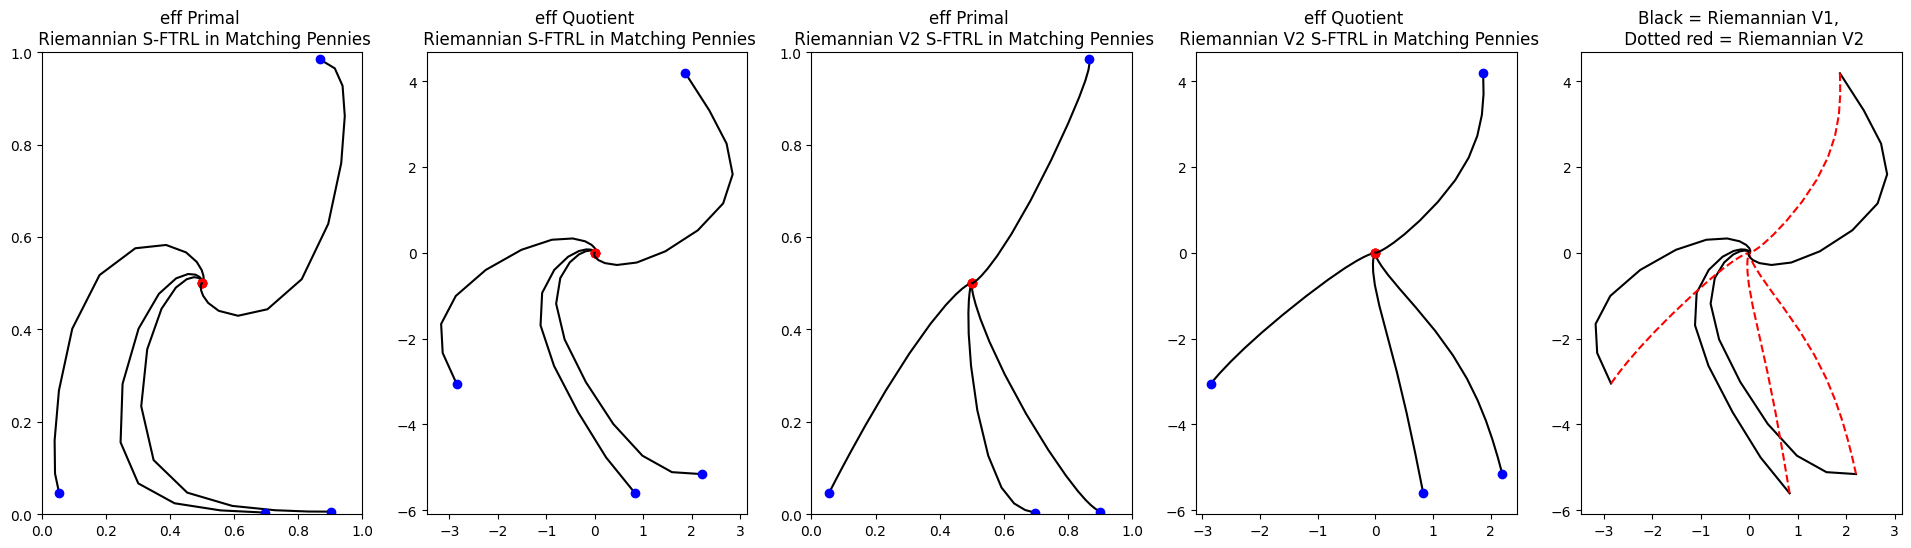

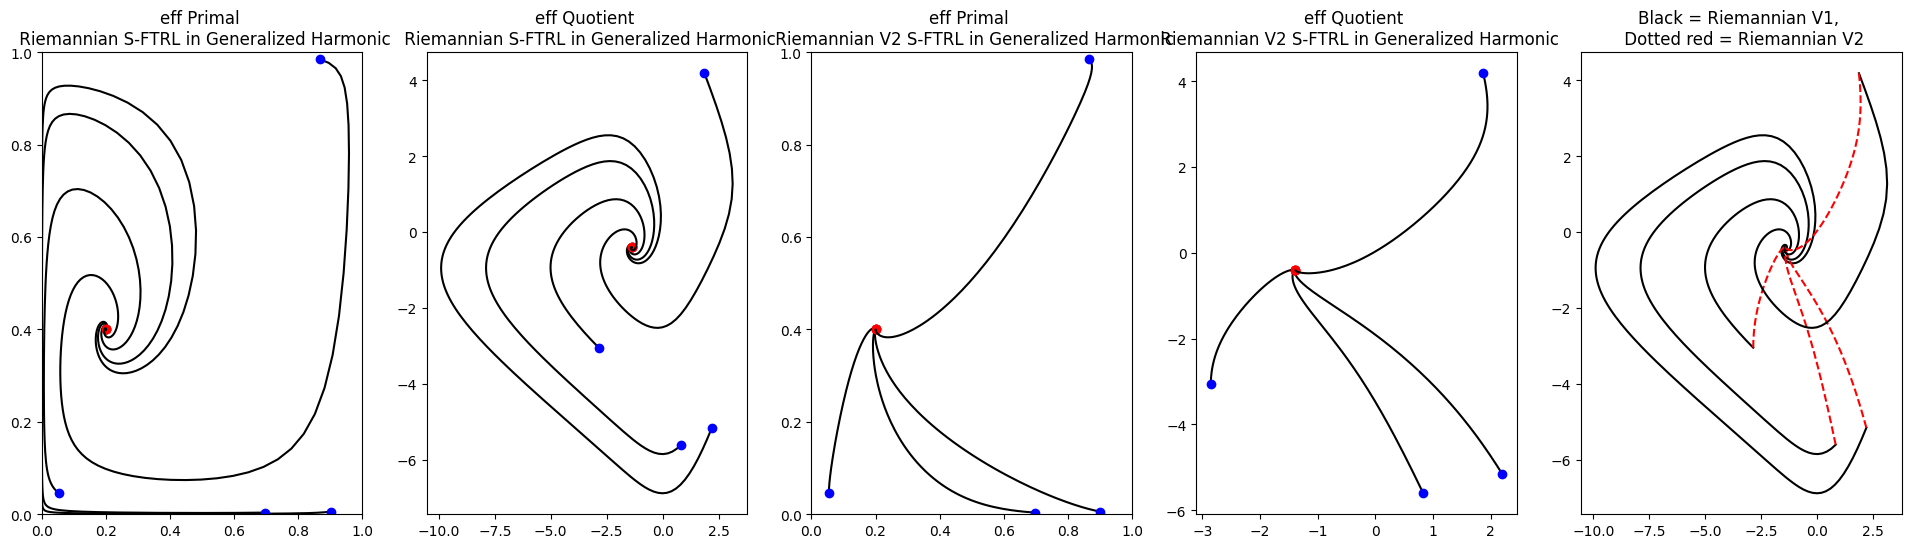

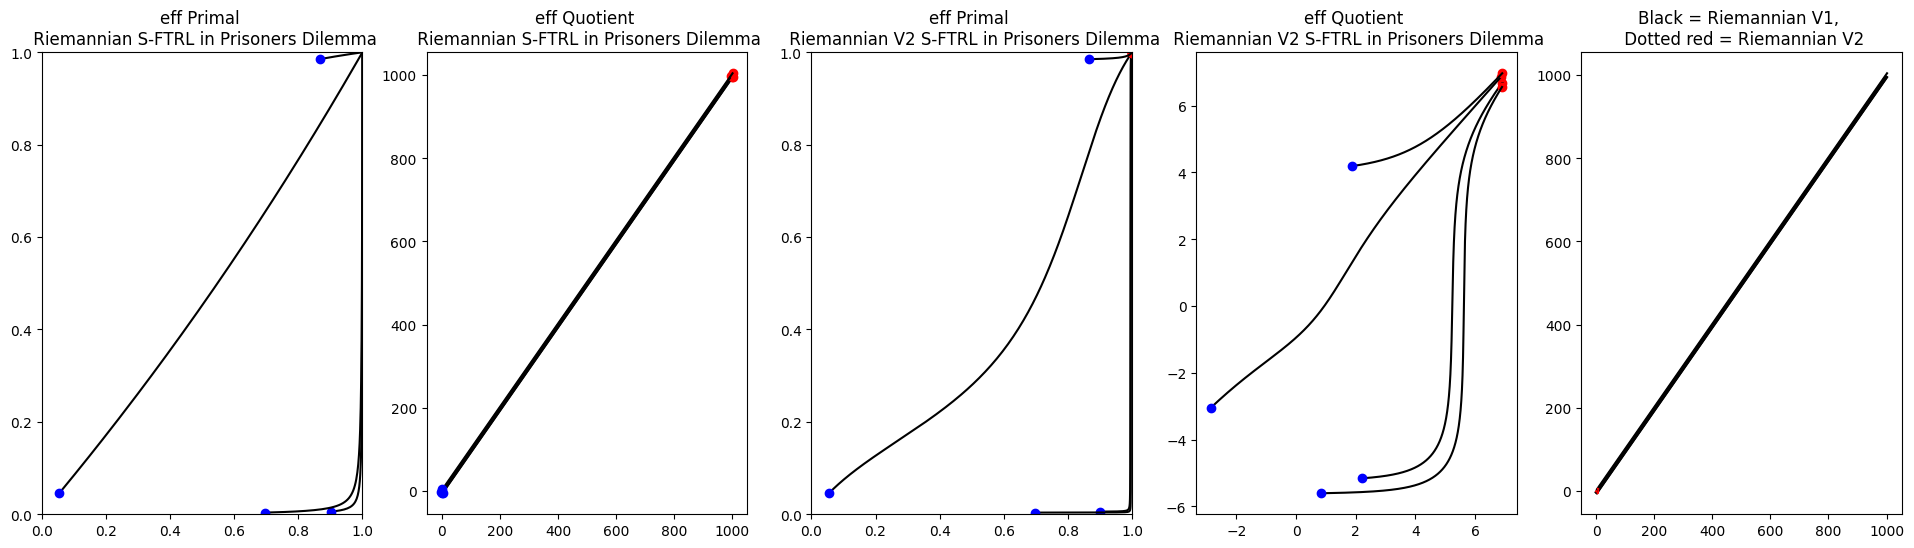

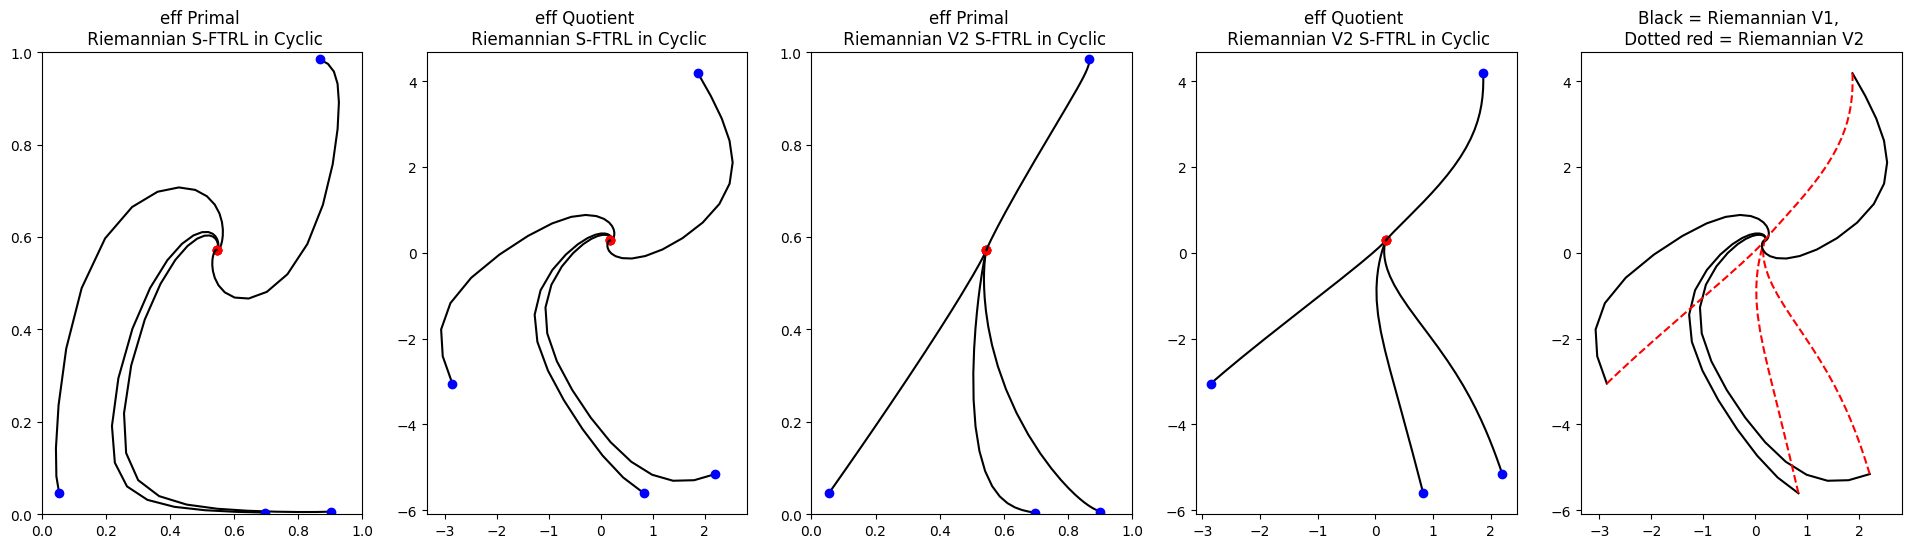

In [93]:
# X and Z effective, geometric symplectic VERSION 1 vs geometric symplectic VERSION 2
time = np.linspace(0, 1000, 10000)

LAM = -0.3

for i, s in enumerate(eff_ZSFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 5, 1)
    ax2 = fig.add_subplot(1, 5, 2)
    ax3 = fig.add_subplot(1, 5, 3)
    ax4 = fig.add_subplot(1, 5, 4)
    ax5 = fig.add_subplot(1, 5, 5)
    
    for z0 in initial_eff_quot_points:

        riem_1_eff_quot_points = odeint(s.geom_sftrl_dyn, z0, time, args = (LAM,))
        plot_effZmethod(ax1, ax2, riem_1_eff_quot_points, s)
        ax1.set_title(f'eff Primal \n Riemannian S-FTRL in {s.name}')
        ax2.set_title(f'eff Quotient \n Riemannian S-FTRL in {s.name}')

        riem_2_eff_quot_points = odeint(s.geom_sftrl_dyn_2, z0, time, args = (LAM,))
        plot_effZmethod(ax3, ax4, riem_2_eff_quot_points, s)
        ax3.set_title(f'eff Primal \n Riemannian V2 S-FTRL in {s.name}')
        ax4.set_title(f'eff Quotient \n Riemannian V2 S-FTRL in {s.name}')
        
        # points_diff = riem_1_eff_quot_points - riem_2_eff_quot_points
        ax5.plot( *coords_points(riem_1_eff_quot_points), 'k')
        ax5.plot( *coords_points(riem_2_eff_quot_points), '--r')
        ax5.set_title('Black = Riemannian V1, \n Dotted red = Riemannian V2' )

    

    #plt.legend(loc = 'best')
    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


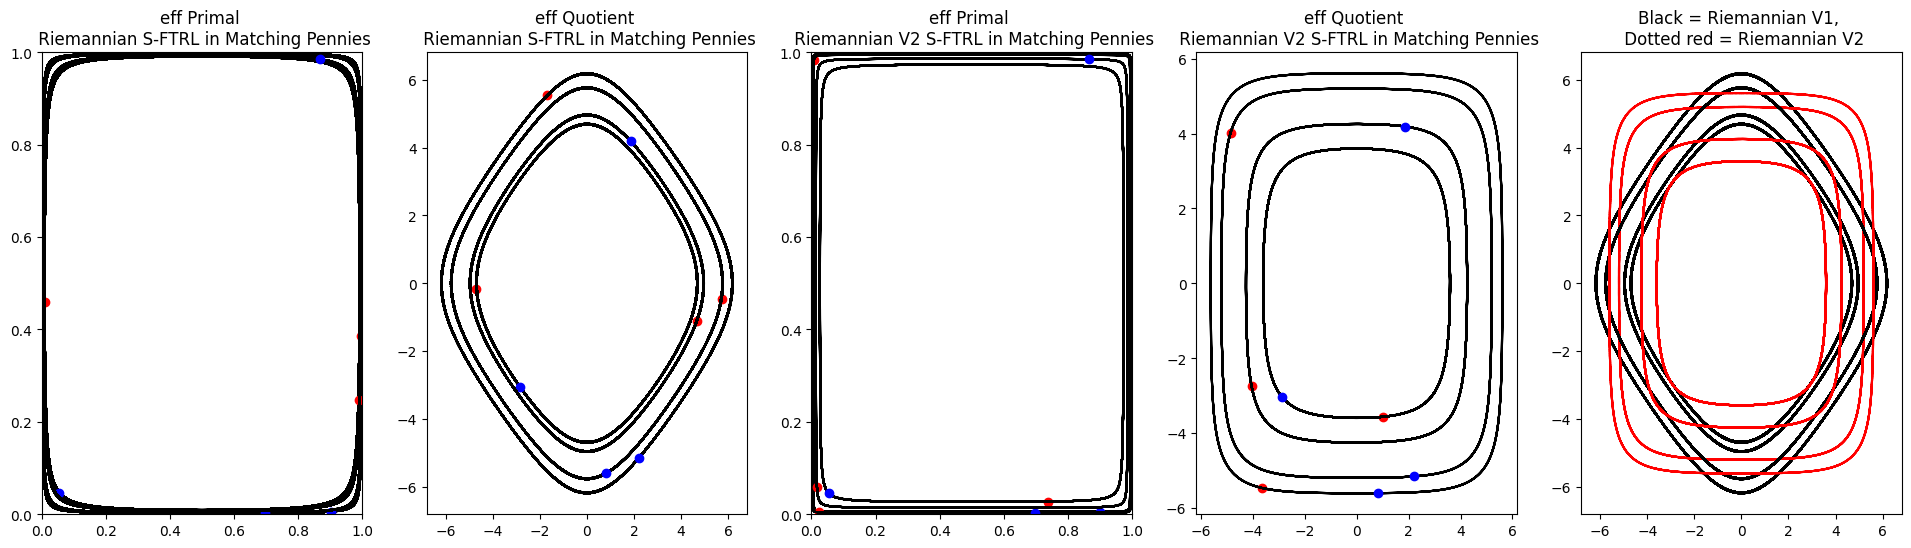

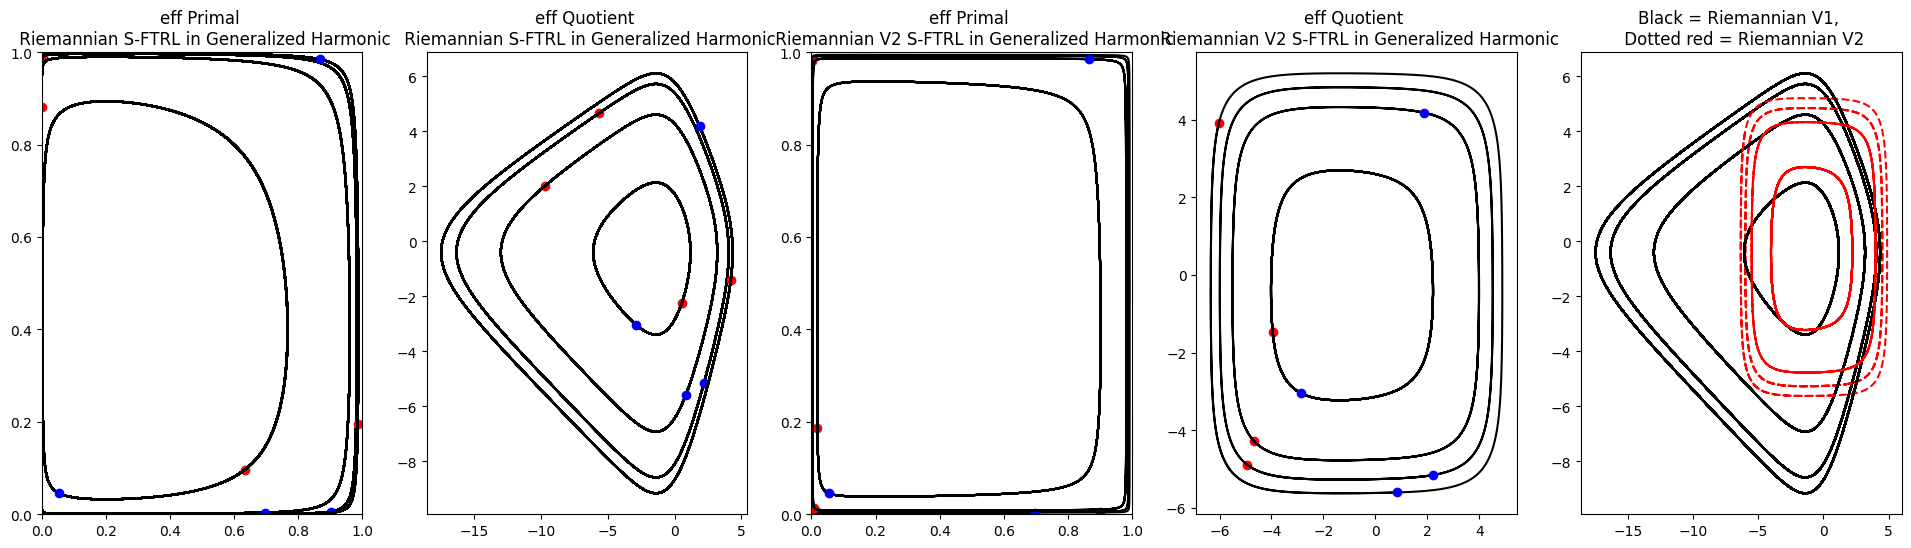

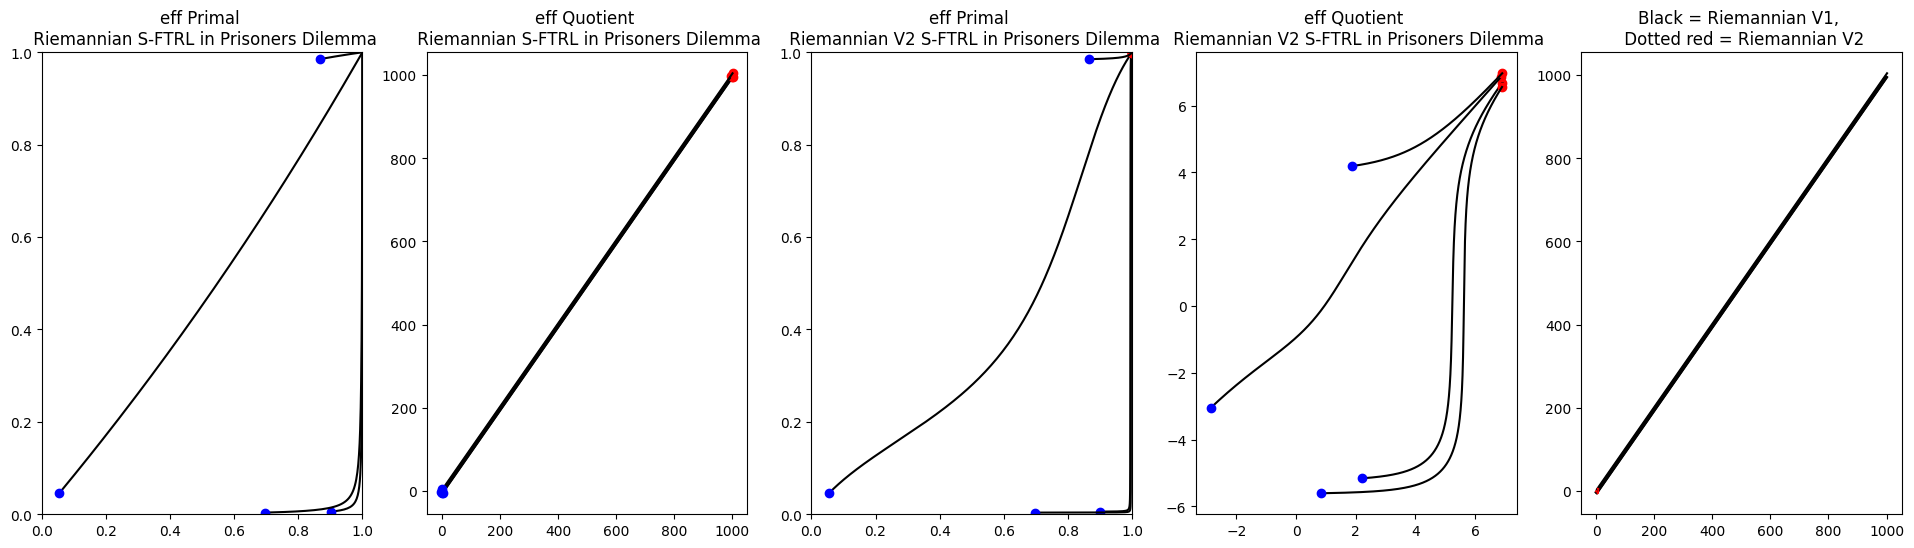

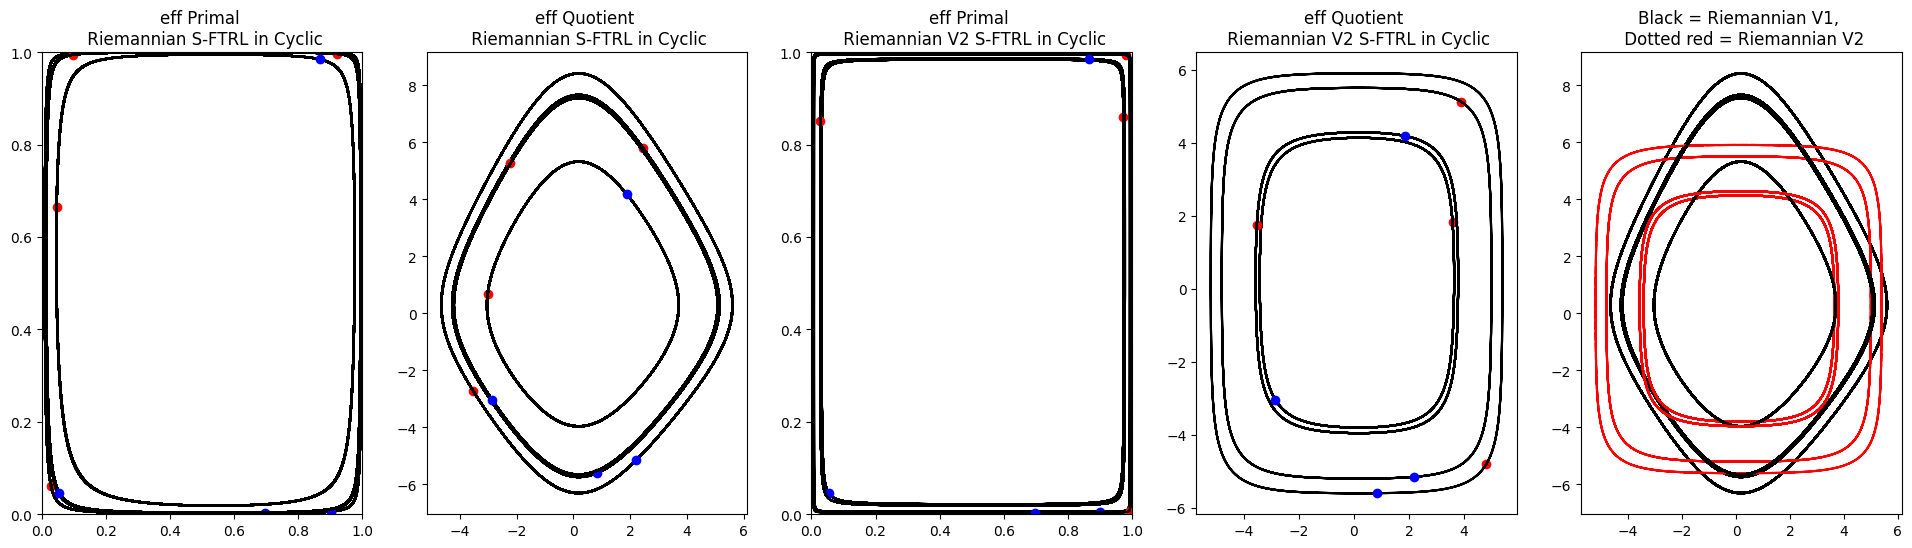

In [94]:
# X and Z effective, geometric symplectic VERSION 1 vs geometric symplectic VERSION 2; lambda = 0 (no sympletic correction)
time = np.linspace(0, 1000, 10000)

LAM = 0

for i, s in enumerate(eff_ZSFTRL_GAMES):

    fig = plt.figure(figsize = (24,6))
    
    ax1 = fig.add_subplot(1, 5, 1)
    ax2 = fig.add_subplot(1, 5, 2)
    ax3 = fig.add_subplot(1, 5, 3)
    ax4 = fig.add_subplot(1, 5, 4)
    ax5 = fig.add_subplot(1, 5, 5)
    
    for z0 in initial_eff_quot_points:

        riem_1_eff_quot_points = odeint(s.geom_sftrl_dyn, z0, time, args = (LAM,))
        plot_effZmethod(ax1, ax2, riem_1_eff_quot_points, s)
        ax1.set_title(f'eff Primal \n Riemannian S-FTRL in {s.name}')
        ax2.set_title(f'eff Quotient \n Riemannian S-FTRL in {s.name}')

        riem_2_eff_quot_points = odeint(s.geom_sftrl_dyn_2, z0, time, args = (LAM,))
        plot_effZmethod(ax3, ax4, riem_2_eff_quot_points, s)
        ax3.set_title(f'eff Primal \n Riemannian V2 S-FTRL in {s.name}')
        ax4.set_title(f'eff Quotient \n Riemannian V2 S-FTRL in {s.name}')
        
        # points_diff = riem_1_eff_quot_points - riem_2_eff_quot_points
        ax5.plot( *coords_points(riem_1_eff_quot_points), 'k')
        ax5.plot( *coords_points(riem_2_eff_quot_points), '--r')
        ax5.set_title('Black = Riemannian V1, \n Dotted red = Riemannian V2' )

    

    #plt.legend(loc = 'best')
    plt.show()
        
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.legend(loc = 'best')
   


In [71]:
test

In [72]:
TEST = symplecticFTRL.SFTRL(MP.map_payfield, logit.Q, primal_vars, dual_vars, MP.name) 

In [73]:
TEST.sym_symplectic_1form

Matrix([
[ 144*(exp(y0_0) - exp(y0_1))*exp(y0_0 + y0_1 + y1_0 + y1_1)/((exp(y0_0) + exp(y0_1))**3*(exp(y1_0) + exp(y1_1))**2)],
[144*(-exp(y0_0) + exp(y0_1))*exp(y0_0 + y0_1 + y1_0 + y1_1)/((exp(y0_0) + exp(y0_1))**3*(exp(y1_0) + exp(y1_1))**2)],
[ 144*(exp(y1_0) - exp(y1_1))*exp(y0_0 + y0_1 + y1_0 + y1_1)/((exp(y0_0) + exp(y0_1))**2*(exp(y1_0) + exp(y1_1))**3)],
[144*(-exp(y1_0) + exp(y1_1))*exp(y0_0 + y0_1 + y1_0 + y1_1)/((exp(y0_0) + exp(y0_1))**2*(exp(y1_0) + exp(y1_1))**3)]])

In [74]:
TEST.sym_JQ

Matrix([
[exp(y0_0)/(exp(y0_0) + exp(y0_1)) - exp(2*y0_0)/(exp(y0_0) + exp(y0_1))**2,                            -exp(y0_0)*exp(y0_1)/(exp(y0_0) + exp(y0_1))**2,                                                                          0,                                                                          0],
[                           -exp(y0_0)*exp(y0_1)/(exp(y0_0) + exp(y0_1))**2, exp(y0_1)/(exp(y0_0) + exp(y0_1)) - exp(2*y0_1)/(exp(y0_0) + exp(y0_1))**2,                                                                          0,                                                                          0],
[                                                                         0,                                                                          0, exp(y1_0)/(exp(y1_0) + exp(y1_1)) - exp(2*y1_0)/(exp(y1_0) + exp(y1_1))**2,                            -exp(y1_0)*exp(y1_1)/(exp(y1_0) + exp(y1_1))**2],
[                                                                        

## Geometric version must be done in quotient space and in local coordinates to eliminate degeneracy

- $V \circ Q + \lambda [d(V \circ Q)](V \circ Q)$ works in $Y$, but it implies using Euclidean metric in dual space to identify 1-forms and vector fields
- it would be tempting to do $V \circ Q + \lambda \big[[d (Q^{\ast}V)](V \circ Q)\big]^{\sharp}$ to have geometric consistence in $Y$
- howevere these is no natural Riemannian metric in $Y$:
    - in $Y$, $h^{\ast}$ is in general only convex, not strictly convex, so it's hessian is in general not positive definite. In practice, the matrix $\text{Hess}h^{\ast} = \text{Jac}Q$ is **not invertible**, zero determinant (calculation done also on paper), so does not allow to define sharp operator on $Y$. This reflects the degeneracy / redundancy one introduces lifting to dual space
    - one could hope that degenercy can be quotiented away to $Z$ space. In this case though it's not clear which the metric should be, must to it on paper. The naive $\text{Jac} \hat{Q}$ is **not symmetric** if one retains all the coordinates (e.g $(0, z_1, 0, z_2)$ in 2x2 game
    - to get $\text{Jac}\hat{Q}$ both symmetric and positive-definite one must work in local coordinates, i.e. pull-back the vector field $Z$ to the hyperplane; equivalently, work from the very beginnin with effective payoff field. 

In [75]:
SFTRL_GAMES[0].sym_JQ

Matrix([
[exp(y0_0)/(exp(y0_0) + exp(y0_1)) - exp(2*y0_0)/(exp(y0_0) + exp(y0_1))**2,                            -exp(y0_0)*exp(y0_1)/(exp(y0_0) + exp(y0_1))**2,                                                                          0,                                                                          0],
[                           -exp(y0_0)*exp(y0_1)/(exp(y0_0) + exp(y0_1))**2, exp(y0_1)/(exp(y0_0) + exp(y0_1)) - exp(2*y0_1)/(exp(y0_0) + exp(y0_1))**2,                                                                          0,                                                                          0],
[                                                                         0,                                                                          0, exp(y1_0)/(exp(y1_0) + exp(y1_1)) - exp(2*y1_0)/(exp(y1_0) + exp(y1_1))**2,                            -exp(y1_0)*exp(y1_1)/(exp(y1_0) + exp(y1_1))**2],
[                                                                        

In [76]:
SFTRL_GAMES[0].sym_JQ.det()

0

In [77]:
ZSFTRL_GAMES[0].sym_JQ

Matrix([
[0,                              -exp(z0_1)/(exp(z0_1) + 1)**2, 0,                                                          0],
[0, exp(z0_1)/(exp(z0_1) + 1) - exp(2*z0_1)/(exp(z0_1) + 1)**2, 0,                                                          0],
[0,                                                          0, 0,                              -exp(z1_1)/(exp(z1_1) + 1)**2],
[0,                                                          0, 0, exp(z1_1)/(exp(z1_1) + 1) - exp(2*z1_1)/(exp(z1_1) + 1)**2]])

In [78]:
ZSFTRL_GAMES[0].sym_JQ.det()

0

## Positive definite (to check; cf Candogan code)

In [79]:
eff_ZSFTRL_GAMES[0].sym_JQ

Matrix([
[exp(z0_1)/(exp(z0_1) + 1) - exp(2*z0_1)/(exp(z0_1) + 1)**2,                                                          0],
[                                                         0, exp(z1_1)/(exp(z1_1) + 1) - exp(2*z1_1)/(exp(z1_1) + 1)**2]])

In [80]:
eff_ZSFTRL_GAMES[0].sym_JQ.det()

(exp(2*z0_1)*exp(2*z1_1) + exp(2*z0_1)*exp(z1_1) + exp(z0_1)*exp(2*z1_1) + exp(z0_1)*exp(z1_1))/(exp(3*z0_1)*exp(3*z1_1) + 3*exp(3*z0_1)*exp(2*z1_1) + 3*exp(3*z0_1)*exp(z1_1) + exp(3*z0_1) + 3*exp(2*z0_1)*exp(3*z1_1) + 9*exp(2*z0_1)*exp(2*z1_1) + 9*exp(2*z0_1)*exp(z1_1) + 3*exp(2*z0_1) + 3*exp(z0_1)*exp(3*z1_1) + 9*exp(z0_1)*exp(2*z1_1) + 9*exp(z0_1)*exp(z1_1) + 3*exp(z0_1) + exp(3*z1_1) + 3*exp(2*z1_1) + 3*exp(z1_1) + 1)

## Geometric version

In [81]:
MP_SFTRL.sym_JQ.det()

NameError: name 'MP_SFTRL' is not defined

In [ ]:
MP_SFTRL.sym_QpullV

In [ ]:
MP_SFTRL.sym_d_QpullV

## Careful about inversion of $JQ$ , must do in Z!

In [ ]:
MP_SFTRL.sftrl_dyn([1, 2, 3, 5], 0, 0.1)

In [ ]:
MP_SFTRL.VQ( [1, 2, 3, 5] )

## ODE

In [ ]:
time = np.linspace(0, 100, 10000)

In [ ]:
import random

num_orbits = 1

#initial_dual_points = [[random.uniform(-5, 5) for _ in range(4)] for n in range(num_orbits)]
initial_dual_points = [ [2,2.5,2.1,2.4] ]

In [ ]:
for s in SFTRL_GAMES:
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    for y0 in initial_dual_points:
        dual_points = odeint(s.sftrl_dyn, y0, time, args = (-0.0,))
        y00, y01, y10, y11 = coords_points(dual_points) # dual coords
        ax2.plot(y01[0], y11[0], 'bo', label = 'initial')
        ax2.plot(y01[-1], y11[-1], 'ro', label = 'final', ms = 8)
        ax2.plot(y01, y11, 'k')
        
        primal_points = [s.choice(*y) for y in dual_points]
        x00, x01, x10, x11 = coords_points(primal_points) # primal coords
        ax1.plot(x01, x11, 'k')
        ax1.plot(x01[0], x11[0], 'bo', label = 'initial')
        ax1.plot(x01[-1], x11[-1], 'ro', label = 'final', ms = 8)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_title('PRIMAL')
    ax2.set_title('DUAL')
    #plt.legend(loc = 'best')
    plt.title(f'Standard FTRL in {s.name} (finite games $\\to$ constrained setting & entropic regularizer)')
    plt.show()

In [ ]:
for s in SFTRL_GAMES:
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    for y0 in initial_dual_points:
        dual_points = odeint(s.sftrl_dyn, y0, time, args = (-0.1,))  # <----------- symplectic correction
        y00, y01, y10, y11 = coords_points(dual_points) # dual coords
        ax2.plot(y01[0], y11[0], 'bo', label = 'initial')
        ax2.plot(y01[-1], y11[-1], 'ro', label = 'final', ms = 8)
        ax2.plot(y01, y11, 'k')
        
        primal_points = [s.choice(*y) for y in dual_points]
        x00, x01, x10, x11 = coords_points(primal_points) # primal coords
        ax1.plot(x01, x11, 'k')
        ax1.plot(x01[0], x11[0], 'bo', label = 'initial')
        ax1.plot(x01[-1], x11[-1], 'ro', label = 'final', ms = 8)
        
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_title('PRIMAL')
    ax2.set_title('DUAL')
    plt.title(f'Symplectic FTRL in {s.name} (finite games $\\to$ constrained setting & entropic regularizer)\n\n')
    plt.show()